# Cleaning anomalies in time series per region slug



## Load  libraries

In [ ]:
# %load first_cell.py
%reload_ext autoreload
%autoreload 2
from pathlib import Path
home = str(Path.home())

import sys
sys.path = sys.path + [f'{home}/.conda/envs/norm_env/lib/python37.zip', 
                       f'{home}/.conda/envs/norm_env/lib/python3.7', 
                       f'{home}/.conda/envs/norm_env/lib/python3.7/lib-dynload', 
                       f'{home}/.conda/envs/norm_env/lib/python3.7/site-packages']
sys.prefix = '/home/soniame/.conda/envs/norm_env'

from paths import RAW_PATH, TREAT_PATH, OUTPUT_PATH, FIGURES_PATH

In [ ]:
#import pandas as pd  
#import datetime 
#dates = pd.Series(['2010-11-01','2010-11-02','2010-11-03',
#               '2010-12-24', '2010-12-25', '2010-12-26', 
#               '2010-12-27', '2010-12-28', '2010-12-29', 
#               '2010-12-30', '2011-01-01', '2011-01-02'])

#### Run single

In [ ]:
from src.runners.clean import _run_single 

In [ ]:
daily, weekly = _run_single(region_slug='country_brazil', 
                            anomaly_vote_minimun_s1=1, 
                            anomaly_vote_minimun_s2=1, 
                            c_metric = 'max', 
                            f_metric = 4, 
                            print_report = True, 
                            print_plot = True)

In [ ]:
import plotnine as p9
p9.theme_set(p9.theme_linedraw()) # default theme

In [ ]:
daily.head(3)
gg = (p9.ggplot(daily, p9.aes(x = 'date', y='tcp')) 
 + p9.geom_line(size= 1, alpha = .7)
 + p9.geom_line(p9.aes( y='tcp_clean'), color = 'red', size= 1, alpha = .7)
 + p9.theme(figure_size=(6, 3),
            axis_text_x=p9.element_text(size = 7)) )
gg 

In [ ]:
daily.head(3)
gg = (p9.ggplot(daily, p9.aes(x = 'date', y='tcp')) 
 + p9.geom_line(size= 1, alpha = .7)
 + p9.theme(figure_size=(6, 3),
            axis_text_x=p9.element_text(size = 7)) )
gg 

In [ ]:
weekly.head(3)
gg = (p9.ggplot(weekly, p9.aes(x = 'date_min', y='tcp')) 
 + p9.geom_line() 
 + p9.geom_line(p9.aes( y='tcp_clean'), color = 'red'))
gg

In [ ]:
print(daily.date.min())
print(daily.date.max())
print(weekly.week.max())

#### Run by batch

In [2]:
from src.runners.clean import _run_batch 

../src/utils.py:158: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.


In [76]:
_run_batch(athena_path = "/home/soniame/shared/spd-sdv-omitnik-waze/corona", 
          c_metric = 'max',
          f_metric = 20)

2021-05-27 14:20:44.271 | INFO     | src.runners.clean:_run_batch:924 - TO DO regions  81
2021-05-27 14:20:44.272 | INFO     | src.runners.clean:_run_single:852 - ... here we go aguascalientes...

2021-05-27 14:20:44.275 | DEBUG    | src.runners.clean:_reading_data:703 - 
        select 
            *,
            date_parse(concat(cast(year as varchar), ' ', cast(month as varchar), ' ', cast(day as varchar)), '%Y %m %e') date
        from spd_sdv_waze_corona.prod_daily_daily_index
        where region_slug in ('aguascalientes')
        
2021-05-27 14:20:46.800 | DEBUG    | src.runners.clean:_c_param:364 - C max: 1.0273899198125596
2021-05-27 14:20:46.819 | DEBUG    | src.runners.clean:_c_param:364 - C max: 20.547798396251192
2021-05-27 14:20:46.823 | DEBUG    | src.runners.clean:_run_step:782 - ... step start ...
2021-05-27 14:20:46.824 | INFO     | src.runners.clean:_run_step:783 - Target variable: observed 

2021-05-27 14:20:46.825 | DEBUG    | src.runners.clean:_find_anomalies:207 

2021-05-27 14:20:49.023 | DEBUG    | src.runners.clean:_write_missing:710 - ... writing anomalies file ...
/home/soniame/.conda/envs/IDB-IDB-Invest-Coronavirus-Impact-Dashboard/lib/python3.7/site-packages/plotnine/ggplot.py:848: PlotnineWarning: Filename: /home/soniame/shared/spd-sdv-omitnik-waze/corona/cleaning/figures/plot_aguascalientes.pdf
2021-05-27 14:20:50.451 | INFO     | src.runners.clean:_run_single:906 - ... aguascalientes done ...

2021-05-27 14:20:50.453 | INFO     | src.runners.clean:_run_single:852 - ... here we go arequipa...

2021-05-27 14:20:50.454 | DEBUG    | src.runners.clean:_reading_data:703 - 
        select 
            *,
            date_parse(concat(cast(year as varchar), ' ', cast(month as varchar), ' ', cast(day as varchar)), '%Y %m %e') date
        from spd_sdv_waze_corona.prod_daily_daily_index
        where region_slug in ('arequipa')
        
2021-05-27 14:20:51.860 | DEBUG    | src.runners.clean:_c_param:364 - C max: 1.3707797834677795
2021-05-27 14:

2021-05-27 14:20:52.995 | DEBUG    | src.runners.clean:_impute_anomalies:304 - 
... imputing outliers ...
2021-05-27 14:20:53.038 | INFO     | src.runners.clean:_run_step:802 - Output variable S2_shift
2021-05-27 14:20:53.039 | DEBUG    | src.runners.clean:_shift_level:558 - 

2021-05-27 14:20:53.040 | DEBUG    | src.runners.clean:_shift_level:559 - ... shifting levels for Loess ...
2021-05-27 14:20:53.042 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating Loess...

2021-05-27 14:20:53.047 | DEBUG    | src.runners.clean:_run_shift_grid:414 - ... shift level running grid  ...

2021-05-27 14:20:53.048 | DEBUG    | src.runners.clean:_run_shift_grid:416 - C_LS 27.41559566935559
2021-05-27 14:20:53.610 | DEBUG    | src.runners.clean:_run_shift_grid:436 - Total combinations: 25

2021-05-27 14:20:53.611 | DEBUG    | src.runners.clean:_shift_sum:459 - LS 2020 Start 2020-03-31 - 2020-12-15
2021-05-27 14:20:53.611 | DEBUG    | src.runners.clean:_shift_sum:460 - LS 2021 Start Non

2021-05-27 14:20:58.857 | DEBUG    | src.runners.clean:_find_anomalies:222 - [Timestamp('2020-08-22 00:00:00'), Timestamp('2020-08-24 00:00:00'), Timestamp('2020-11-22 00:00:00'), Timestamp('2020-12-06 00:00:00'), Timestamp('2020-12-13 00:00:00'), Timestamp('2021-01-17 00:00:00'), Timestamp('2021-01-24 00:00:00'), Timestamp('2021-01-31 00:00:00'), Timestamp('2021-02-07 00:00:00'), Timestamp('2021-02-14 00:00:00'), Timestamp('2021-02-21 00:00:00'), Timestamp('2021-02-28 00:00:00'), Timestamp('2021-03-07 00:00:00'), Timestamp('2021-03-14 00:00:00'), Timestamp('2021-03-21 00:00:00'), Timestamp('2021-03-22 00:00:00'), Timestamp('2021-03-28 00:00:00'), Timestamp('2021-04-04 00:00:00'), Timestamp('2021-04-11 00:00:00'), Timestamp('2021-04-17 00:00:00'), Timestamp('2021-04-18 00:00:00'), Timestamp('2021-05-02 00:00:00'), Timestamp('2021-05-09 00:00:00'), Timestamp('2021-05-16 00:00:00')]
2021-05-27 14:20:58.860 | DEBUG    | src.runners.clean:_impute_anomalies:304 - 
... imputing outliers ...


2021-05-27 14:21:03.682 | DEBUG    | src.runners.clean:_run_step:782 - ... step start ...
2021-05-27 14:21:03.683 | INFO     | src.runners.clean:_run_step:783 - Target variable: S1_shift 

2021-05-27 14:21:03.683 | DEBUG    | src.runners.clean:_find_anomalies:207 - 
... finding outliers ...
2021-05-27 14:21:03.684 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating S1_shift...

2021-05-27 14:21:03.689 | DEBUG    | src.runners.clean:_c_trun:137 - C truncated: 1.5
2021-05-27 14:21:03.690 | DEBUG    | src.runners.clean:_anomalies_detector:159 - C_TRUNC 1.5
../src/runners/clean.py:174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https

2021-05-27 14:21:13.876 | DEBUG    | src.runners.clean:_run_shift_grid:436 - Total combinations: 25

2021-05-27 14:21:13.877 | DEBUG    | src.runners.clean:_shift_sum:459 - LS 2020 Start 2020-03-31 - 2020-12-15
2021-05-27 14:21:13.877 | DEBUG    | src.runners.clean:_shift_sum:460 - LS 2021 Start None - None
2021-05-27 14:21:14.116 | DEBUG    | src.runners.clean:_initial_shift_date:497 - Shift found at NaT
2021-05-27 14:21:14.119 | DEBUG    | src.runners.clean:_shift_ts:530 - 

2021-05-27 14:21:14.120 | DEBUG    | src.runners.clean:_shift_ts:531 - Center point: nan
../src/runners/clean.py:538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:503: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pa

2021-05-27 14:21:19.629 | DEBUG    | src.runners.clean:_impute_anomalies:304 - 
... imputing outliers ...
2021-05-27 14:21:19.672 | INFO     | src.runners.clean:_run_step:802 - Output variable S1_shift
2021-05-27 14:21:19.673 | DEBUG    | src.runners.clean:_shift_level:558 - 

2021-05-27 14:21:19.676 | DEBUG    | src.runners.clean:_shift_level:559 - ... shifting levels for Loess ...
2021-05-27 14:21:19.677 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating Loess...

2021-05-27 14:21:19.682 | DEBUG    | src.runners.clean:_run_shift_grid:414 - ... shift level running grid  ...

2021-05-27 14:21:19.683 | DEBUG    | src.runners.clean:_run_shift_grid:416 - C_LS 35.77106870869383
2021-05-27 14:21:20.249 | DEBUG    | src.runners.clean:_run_shift_grid:436 - Total combinations: 25

2021-05-27 14:21:20.250 | DEBUG    | src.runners.clean:_shift_sum:459 - LS 2020 Start 2020-03-31 - 2020-12-15
2021-05-27 14:21:20.251 | DEBUG    | src.runners.clean:_shift_sum:460 - LS 2021 Start Non

2021-05-27 14:21:26.002 | DEBUG    | src.runners.clean:_impute_anomalies:304 - 
... imputing outliers ...
2021-05-27 14:21:26.047 | INFO     | src.runners.clean:_run_step:802 - Output variable S1_shift
2021-05-27 14:21:26.048 | DEBUG    | src.runners.clean:_shift_level:558 - 

2021-05-27 14:21:26.048 | DEBUG    | src.runners.clean:_shift_level:559 - ... shifting levels for Loess ...
2021-05-27 14:21:26.050 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating Loess...

2021-05-27 14:21:26.056 | DEBUG    | src.runners.clean:_run_shift_grid:414 - ... shift level running grid  ...

2021-05-27 14:21:26.056 | DEBUG    | src.runners.clean:_run_shift_grid:416 - C_LS 20.91155223667804
2021-05-27 14:21:26.628 | DEBUG    | src.runners.clean:_run_shift_grid:436 - Total combinations: 25

2021-05-27 14:21:26.629 | DEBUG    | src.runners.clean:_shift_sum:459 - LS 2020 Start 2020-03-31 - 2020-12-15
2021-05-27 14:21:26.630 | DEBUG    | src.runners.clean:_shift_sum:460 - LS 2021 Start Non

2021-05-27 14:21:36.040 | DEBUG    | src.runners.clean:_find_anomalies:222 - [Timestamp('2020-08-23 00:00:00'), Timestamp('2020-11-25 00:00:00'), Timestamp('2020-12-08 00:00:00'), Timestamp('2021-03-22 00:00:00'), Timestamp('2021-04-01 00:00:00'), Timestamp('2021-04-02 00:00:00'), Timestamp('2021-04-05 00:00:00'), Timestamp('2021-04-06 00:00:00'), Timestamp('2021-04-07 00:00:00'), Timestamp('2021-04-08 00:00:00'), Timestamp('2021-04-11 00:00:00'), Timestamp('2021-04-25 00:00:00'), Timestamp('2021-04-28 00:00:00'), Timestamp('2021-04-30 00:00:00'), Timestamp('2021-05-01 00:00:00'), Timestamp('2021-05-02 00:00:00'), Timestamp('2021-05-17 00:00:00')]
2021-05-27 14:21:36.042 | DEBUG    | src.runners.clean:_impute_anomalies:304 - 
... imputing outliers ...
2021-05-27 14:21:36.086 | INFO     | src.runners.clean:_run_step:802 - Output variable S1_shift
2021-05-27 14:21:36.086 | DEBUG    | src.runners.clean:_shift_level:558 - 

2021-05-27 14:21:36.087 | DEBUG    | src.runners.clean:_shift_leve

2021-05-27 14:21:42.635 | DEBUG    | src.runners.clean:_find_anomalies:222 - [Timestamp('2020-08-18 00:00:00'), Timestamp('2020-08-19 00:00:00'), Timestamp('2020-08-20 00:00:00'), Timestamp('2020-08-21 00:00:00'), Timestamp('2020-08-22 00:00:00'), Timestamp('2020-08-23 00:00:00'), Timestamp('2020-08-24 00:00:00'), Timestamp('2020-08-25 00:00:00'), Timestamp('2020-08-26 00:00:00'), Timestamp('2020-08-27 00:00:00'), Timestamp('2020-08-28 00:00:00'), Timestamp('2020-08-29 00:00:00'), Timestamp('2020-08-31 00:00:00'), Timestamp('2020-11-25 00:00:00'), Timestamp('2020-11-30 00:00:00'), Timestamp('2020-12-02 00:00:00'), Timestamp('2020-12-04 00:00:00'), Timestamp('2020-12-08 00:00:00'), Timestamp('2020-12-11 00:00:00'), Timestamp('2020-12-14 00:00:00'), Timestamp('2021-02-16 00:00:00'), Timestamp('2021-02-22 00:00:00'), Timestamp('2021-02-23 00:00:00'), Timestamp('2021-03-05 00:00:00'), Timestamp('2021-03-14 00:00:00'), Timestamp('2021-03-21 00:00:00'), Timestamp('2021-03-24 00:00:00'), Time

2021-05-27 14:21:47.453 | DEBUG    | src.runners.clean:_c_param:364 - C max: 29.175160272174786
2021-05-27 14:21:47.457 | DEBUG    | src.runners.clean:_run_step:782 - ... step start ...
2021-05-27 14:21:47.457 | INFO     | src.runners.clean:_run_step:783 - Target variable: observed 

2021-05-27 14:21:47.458 | DEBUG    | src.runners.clean:_find_anomalies:207 - 
... finding outliers ...
2021-05-27 14:21:47.459 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

2021-05-27 14:21:47.466 | DEBUG    | src.runners.clean:_c_trun:137 - C truncated: 1.5
2021-05-27 14:21:47.466 | DEBUG    | src.runners.clean:_anomalies_detector:159 - C_TRUNC 1.5
../src/runners/clean.py:174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:175: SettingWithCopyWarning: 
A value is try

2021-05-27 14:21:49.666 | DEBUG    | src.runners.clean:_write_missing:710 - ... writing anomalies file ...
/home/soniame/.conda/envs/IDB-IDB-Invest-Coronavirus-Impact-Dashboard/lib/python3.7/site-packages/plotnine/ggplot.py:848: PlotnineWarning: Filename: /home/soniame/shared/spd-sdv-omitnik-waze/corona/cleaning/figures/plot_cali.pdf
2021-05-27 14:21:50.971 | INFO     | src.runners.clean:_run_single:906 - ... cali done ...

2021-05-27 14:21:50.972 | INFO     | src.runners.clean:_run_single:852 - ... here we go campinas...

2021-05-27 14:21:50.973 | DEBUG    | src.runners.clean:_reading_data:703 - 
        select 
            *,
            date_parse(concat(cast(year as varchar), ' ', cast(month as varchar), ' ', cast(day as varchar)), '%Y %m %e') date
        from spd_sdv_waze_corona.prod_daily_daily_index
        where region_slug in ('campinas')
        
2021-05-27 14:21:53.694 | DEBUG    | src.runners.clean:_c_param:364 - C max: 0.8807937888708207
2021-05-27 14:21:53.712 | DEBUG   

2021-05-27 14:21:55.452 | DEBUG    | src.runners.clean:_run_shift_grid:436 - Total combinations: 25

2021-05-27 14:21:55.453 | DEBUG    | src.runners.clean:_shift_sum:459 - LS 2020 Start 2020-03-31 - 2020-12-15
2021-05-27 14:21:55.453 | DEBUG    | src.runners.clean:_shift_sum:460 - LS 2021 Start None - None
2021-05-27 14:21:55.691 | DEBUG    | src.runners.clean:_initial_shift_date:497 - Shift found at NaT
2021-05-27 14:21:55.695 | DEBUG    | src.runners.clean:_shift_ts:530 - 

2021-05-27 14:21:55.696 | DEBUG    | src.runners.clean:_shift_ts:531 - Center point: nan
../src/runners/clean.py:538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:503: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pa

2021-05-27 14:22:00.737 | DEBUG    | src.runners.clean:_impute_anomalies:304 - 
... imputing outliers ...
2021-05-27 14:22:00.780 | INFO     | src.runners.clean:_run_step:802 - Output variable S2_shift
2021-05-27 14:22:00.781 | DEBUG    | src.runners.clean:_shift_level:558 - 

2021-05-27 14:22:00.781 | DEBUG    | src.runners.clean:_shift_level:559 - ... shifting levels for Loess ...
2021-05-27 14:22:00.783 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating Loess...

2021-05-27 14:22:00.788 | DEBUG    | src.runners.clean:_run_shift_grid:414 - ... shift level running grid  ...

2021-05-27 14:22:00.789 | DEBUG    | src.runners.clean:_run_shift_grid:416 - C_LS 31.020611575266784
2021-05-27 14:22:01.352 | DEBUG    | src.runners.clean:_run_shift_grid:436 - Total combinations: 25

2021-05-27 14:22:01.353 | DEBUG    | src.runners.clean:_shift_sum:459 - LS 2020 Start 2020-03-31 - 2020-12-15
2021-05-27 14:22:01.354 | DEBUG    | src.runners.clean:_shift_sum:460 - LS 2021 Start No

2021-05-27 14:22:05.891 | DEBUG    | src.runners.clean:_find_anomalies:222 - [Timestamp('2020-07-07 00:00:00'), Timestamp('2020-08-22 00:00:00'), Timestamp('2020-08-23 00:00:00'), Timestamp('2020-08-24 00:00:00'), Timestamp('2021-02-12 00:00:00'), Timestamp('2021-03-07 00:00:00'), Timestamp('2021-03-13 00:00:00'), Timestamp('2021-03-14 00:00:00'), Timestamp('2021-03-20 00:00:00'), Timestamp('2021-03-21 00:00:00'), Timestamp('2021-05-07 00:00:00')]
2021-05-27 14:22:05.893 | DEBUG    | src.runners.clean:_impute_anomalies:304 - 
... imputing outliers ...
2021-05-27 14:22:05.937 | INFO     | src.runners.clean:_run_step:802 - Output variable S2_shift
2021-05-27 14:22:05.937 | DEBUG    | src.runners.clean:_shift_level:558 - 

2021-05-27 14:22:05.938 | DEBUG    | src.runners.clean:_shift_level:559 - ... shifting levels for Loess ...
2021-05-27 14:22:05.940 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating Loess...

2021-05-27 14:22:05.945 | DEBUG    | src.runners.clean:_run_

2021-05-27 14:22:10.999 | DEBUG    | src.runners.clean:_find_anomalies:222 - [Timestamp('2020-08-22 00:00:00'), Timestamp('2020-08-23 00:00:00'), Timestamp('2020-08-24 00:00:00'), Timestamp('2020-12-11 00:00:00'), Timestamp('2021-03-14 00:00:00'), Timestamp('2021-03-21 00:00:00'), Timestamp('2021-03-28 00:00:00'), Timestamp('2021-04-10 00:00:00'), Timestamp('2021-04-11 00:00:00'), Timestamp('2021-05-16 00:00:00'), Timestamp('2021-05-22 00:00:00')]
2021-05-27 14:22:11.001 | DEBUG    | src.runners.clean:_impute_anomalies:304 - 
... imputing outliers ...
2021-05-27 14:22:11.044 | INFO     | src.runners.clean:_run_step:802 - Output variable S2_shift
2021-05-27 14:22:11.045 | DEBUG    | src.runners.clean:_shift_level:558 - 

2021-05-27 14:22:11.045 | DEBUG    | src.runners.clean:_shift_level:559 - ... shifting levels for Loess ...
2021-05-27 14:22:11.047 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating Loess...

2021-05-27 14:22:11.053 | DEBUG    | src.runners.clean:_run_

2021-05-27 14:22:17.208 | DEBUG    | src.runners.clean:_find_anomalies:222 - [Timestamp('2020-08-22 00:00:00'), Timestamp('2020-08-23 00:00:00'), Timestamp('2020-12-08 00:00:00'), Timestamp('2020-12-10 00:00:00'), Timestamp('2020-12-11 00:00:00'), Timestamp('2020-12-13 00:00:00'), Timestamp('2021-02-02 00:00:00'), Timestamp('2021-04-05 00:00:00'), Timestamp('2021-05-07 00:00:00')]
2021-05-27 14:22:17.210 | DEBUG    | src.runners.clean:_impute_anomalies:304 - 
... imputing outliers ...
2021-05-27 14:22:17.254 | INFO     | src.runners.clean:_run_step:802 - Output variable S2_shift
2021-05-27 14:22:17.255 | DEBUG    | src.runners.clean:_shift_level:558 - 

2021-05-27 14:22:17.255 | DEBUG    | src.runners.clean:_shift_level:559 - ... shifting levels for Loess ...
2021-05-27 14:22:17.257 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating Loess...

2021-05-27 14:22:17.262 | DEBUG    | src.runners.clean:_run_shift_grid:414 - ... shift level running grid  ...

2021-05-27 14:22

2021-05-27 14:22:23.565 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating S1_shift...

2021-05-27 14:22:23.570 | DEBUG    | src.runners.clean:_c_trun:137 - C truncated: 1.5
2021-05-27 14:22:23.571 | DEBUG    | src.runners.clean:_anomalies_detector:159 - C_TRUNC 1.5
../src/runners/clean.py:174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-05-27 14:22:23.663 | DEBUG    | src.runners.clean:_find_anomalies:221 - Number of anomalies found: 40

2021-05-27 14:22:23.663 | DEBUG    | src.runners.clean:_find_anomalies:222 - [Timestamp(

2021-05-27 14:22:30.099 | DEBUG    | src.runners.clean:_initial_shift_date:497 - Shift found at NaT
2021-05-27 14:22:30.103 | DEBUG    | src.runners.clean:_shift_ts:530 - 

2021-05-27 14:22:30.104 | DEBUG    | src.runners.clean:_shift_ts:531 - Center point: nan
../src/runners/clean.py:538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:503: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-05-27 14:22:30.141 | DEBUG    | src.runners.clean:_run_step:835 - ... step done ...
2021-05-27 14:22:30.143 | DEBUG    | src.runners.clean:_run_step:782 - ... step start ...
2021-05-27 14:22:30.143 | INFO     | sr

2021-05-27 14:22:35.762 | DEBUG    | src.runners.clean:_run_shift_grid:436 - Total combinations: 25

2021-05-27 14:22:35.763 | DEBUG    | src.runners.clean:_shift_sum:459 - LS 2020 Start 2020-03-31 - 2020-12-15
2021-05-27 14:22:35.764 | DEBUG    | src.runners.clean:_shift_sum:460 - LS 2021 Start None - None
2021-05-27 14:22:36.000 | DEBUG    | src.runners.clean:_initial_shift_date:497 - Shift found at NaT
2021-05-27 14:22:36.004 | DEBUG    | src.runners.clean:_shift_ts:530 - 

2021-05-27 14:22:36.005 | DEBUG    | src.runners.clean:_shift_ts:531 - Center point: nan
../src/runners/clean.py:538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:503: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pa

2021-05-27 14:22:40.021 | DEBUG    | src.runners.clean:_impute_anomalies:304 - 
... imputing outliers ...
2021-05-27 14:22:40.064 | INFO     | src.runners.clean:_run_step:802 - Output variable S1_shift
2021-05-27 14:22:40.065 | DEBUG    | src.runners.clean:_shift_level:558 - 

2021-05-27 14:22:40.067 | DEBUG    | src.runners.clean:_shift_level:559 - ... shifting levels for Loess ...
2021-05-27 14:22:40.068 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating Loess...

2021-05-27 14:22:40.073 | DEBUG    | src.runners.clean:_run_shift_grid:414 - ... shift level running grid  ...

2021-05-27 14:22:40.074 | DEBUG    | src.runners.clean:_run_shift_grid:416 - C_LS 32.135170416955795
2021-05-27 14:22:40.632 | DEBUG    | src.runners.clean:_run_shift_grid:436 - Total combinations: 25

2021-05-27 14:22:40.633 | DEBUG    | src.runners.clean:_shift_sum:459 - LS 2020 Start 2020-03-31 - 2020-12-15
2021-05-27 14:22:40.633 | DEBUG    | src.runners.clean:_shift_sum:460 - LS 2021 Start No

2021-05-27 14:22:44.883 | DEBUG    | src.runners.clean:_impute_anomalies:304 - 
... imputing outliers ...
2021-05-27 14:22:44.926 | INFO     | src.runners.clean:_run_step:802 - Output variable S1_shift
2021-05-27 14:22:44.927 | DEBUG    | src.runners.clean:_shift_level:558 - 

2021-05-27 14:22:44.927 | DEBUG    | src.runners.clean:_shift_level:559 - ... shifting levels for Loess ...
2021-05-27 14:22:44.929 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating Loess...

2021-05-27 14:22:44.935 | DEBUG    | src.runners.clean:_run_shift_grid:414 - ... shift level running grid  ...

2021-05-27 14:22:44.935 | DEBUG    | src.runners.clean:_run_shift_grid:416 - C_LS 26.702904631432766
2021-05-27 14:22:45.497 | DEBUG    | src.runners.clean:_run_shift_grid:436 - Total combinations: 25

2021-05-27 14:22:45.498 | DEBUG    | src.runners.clean:_shift_sum:459 - LS 2020 Start 2020-03-31 - 2020-12-15
2021-05-27 14:22:45.498 | DEBUG    | src.runners.clean:_shift_sum:460 - LS 2021 Start No

2021-05-27 14:22:50.153 | DEBUG    | src.runners.clean:_find_anomalies:222 - [Timestamp('2020-08-18 00:00:00'), Timestamp('2020-08-19 00:00:00'), Timestamp('2020-08-20 00:00:00'), Timestamp('2020-08-21 00:00:00'), Timestamp('2020-08-22 00:00:00'), Timestamp('2020-08-23 00:00:00'), Timestamp('2020-08-24 00:00:00'), Timestamp('2020-08-25 00:00:00'), Timestamp('2020-08-26 00:00:00'), Timestamp('2020-08-27 00:00:00'), Timestamp('2020-08-28 00:00:00'), Timestamp('2020-08-29 00:00:00'), Timestamp('2020-08-31 00:00:00'), Timestamp('2020-11-20 00:00:00'), Timestamp('2020-11-25 00:00:00'), Timestamp('2020-12-02 00:00:00'), Timestamp('2021-02-07 00:00:00'), Timestamp('2021-03-02 00:00:00'), Timestamp('2021-03-07 00:00:00'), Timestamp('2021-03-14 00:00:00'), Timestamp('2021-03-21 00:00:00'), Timestamp('2021-04-02 00:00:00'), Timestamp('2021-04-03 00:00:00'), Timestamp('2021-04-04 00:00:00'), Timestamp('2021-04-09 00:00:00'), Timestamp('2021-04-10 00:00:00'), Timestamp('2021-04-11 00:00:00'), Time

2021-05-27 14:22:55.966 | DEBUG    | src.runners.clean:_c_param:364 - C max: 1.983635178740892
2021-05-27 14:22:55.986 | DEBUG    | src.runners.clean:_c_param:364 - C max: 39.67270357481784
2021-05-27 14:22:55.989 | DEBUG    | src.runners.clean:_run_step:782 - ... step start ...
2021-05-27 14:22:55.990 | INFO     | src.runners.clean:_run_step:783 - Target variable: observed 

2021-05-27 14:22:55.991 | DEBUG    | src.runners.clean:_find_anomalies:207 - 
... finding outliers ...
2021-05-27 14:22:55.993 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

2021-05-27 14:22:55.998 | DEBUG    | src.runners.clean:_c_trun:137 - C truncated: 1.983635178740892
2021-05-27 14:22:55.999 | DEBUG    | src.runners.clean:_anomalies_detector:159 - C_TRUNC 1.983635178740892
../src/runners/clean.py:174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/us

2021-05-27 14:22:59.435 | INFO     | src.runners.clean:_run_single:906 - ... country_el_salvador done ...

2021-05-27 14:22:59.436 | INFO     | src.runners.clean:_run_single:852 - ... here we go country_guatemala...

2021-05-27 14:22:59.437 | DEBUG    | src.runners.clean:_reading_data:703 - 
        select 
            *,
            date_parse(concat(cast(year as varchar), ' ', cast(month as varchar), ' ', cast(day as varchar)), '%Y %m %e') date
        from spd_sdv_waze_corona.prod_daily_daily_index
        where region_slug in ('country_guatemala')
        
2021-05-27 14:23:00.768 | DEBUG    | src.runners.clean:_c_param:364 - C max: 1.3497639329038027
2021-05-27 14:23:00.787 | DEBUG    | src.runners.clean:_c_param:364 - C max: 26.995278658076053
2021-05-27 14:23:00.791 | DEBUG    | src.runners.clean:_run_step:782 - ... step start ...
2021-05-27 14:23:00.792 | INFO     | src.runners.clean:_run_step:783 - Target variable: observed 

2021-05-27 14:23:00.793 | DEBUG    | src.runners.cle

2021-05-27 14:23:02.986 | DEBUG    | src.runners.clean:_write_missing:710 - ... writing anomalies file ...
/home/soniame/.conda/envs/IDB-IDB-Invest-Coronavirus-Impact-Dashboard/lib/python3.7/site-packages/plotnine/ggplot.py:848: PlotnineWarning: Filename: /home/soniame/shared/spd-sdv-omitnik-waze/corona/cleaning/figures/plot_country_guatemala.pdf
2021-05-27 14:23:04.419 | INFO     | src.runners.clean:_run_single:906 - ... country_guatemala done ...

2021-05-27 14:23:04.421 | INFO     | src.runners.clean:_run_single:852 - ... here we go country_honduras...

2021-05-27 14:23:04.422 | DEBUG    | src.runners.clean:_reading_data:703 - 
        select 
            *,
            date_parse(concat(cast(year as varchar), ' ', cast(month as varchar), ' ', cast(day as varchar)), '%Y %m %e') date
        from spd_sdv_waze_corona.prod_daily_daily_index
        where region_slug in ('country_honduras')
        
2021-05-27 14:23:05.781 | DEBUG    | src.runners.clean:_c_param:364 - C max: 3.0
2021-05

2021-05-27 14:23:17.413 | INFO     | src.runners.clean:_run_single:906 - ... country_honduras done ...

2021-05-27 14:23:17.415 | INFO     | src.runners.clean:_run_single:852 - ... here we go country_jamaica...

2021-05-27 14:23:17.416 | DEBUG    | src.runners.clean:_reading_data:703 - 
        select 
            *,
            date_parse(concat(cast(year as varchar), ' ', cast(month as varchar), ' ', cast(day as varchar)), '%Y %m %e') date
        from spd_sdv_waze_corona.prod_daily_daily_index
        where region_slug in ('country_jamaica')
        
2021-05-27 14:23:18.714 | DEBUG    | src.runners.clean:_c_param:364 - C max: 2.1973952336567217
2021-05-27 14:23:18.732 | DEBUG    | src.runners.clean:_c_param:364 - C max: 43.94790467313443
2021-05-27 14:23:18.735 | DEBUG    | src.runners.clean:_run_step:782 - ... step start ...
2021-05-27 14:23:18.736 | INFO     | src.runners.clean:_run_step:783 - Target variable: observed 

2021-05-27 14:23:18.736 | DEBUG    | src.runners.clean:_find

2021-05-27 14:23:21.965 | INFO     | src.runners.clean:_run_single:852 - ... here we go country_mexico...

2021-05-27 14:23:21.968 | DEBUG    | src.runners.clean:_reading_data:703 - 
        select 
            *,
            date_parse(concat(cast(year as varchar), ' ', cast(month as varchar), ' ', cast(day as varchar)), '%Y %m %e') date
        from spd_sdv_waze_corona.prod_daily_daily_index
        where region_slug in ('country_mexico')
        
2021-05-27 14:23:24.603 | DEBUG    | src.runners.clean:_c_param:364 - C max: 1.0694676769115674
2021-05-27 14:23:24.621 | DEBUG    | src.runners.clean:_c_param:364 - C max: 21.389353538231347
2021-05-27 14:23:24.625 | DEBUG    | src.runners.clean:_run_step:782 - ... step start ...
2021-05-27 14:23:24.625 | INFO     | src.runners.clean:_run_step:783 - Target variable: observed 

2021-05-27 14:23:24.626 | DEBUG    | src.runners.clean:_find_anomalies:207 - 
... finding outliers ...
2021-05-27 14:23:24.627 | DEBUG    | src.runners.clean:_valida

2021-05-27 14:23:26.792 | DEBUG    | src.runners.clean:_write_missing:710 - ... writing anomalies file ...
/home/soniame/.conda/envs/IDB-IDB-Invest-Coronavirus-Impact-Dashboard/lib/python3.7/site-packages/plotnine/ggplot.py:848: PlotnineWarning: Filename: /home/soniame/shared/spd-sdv-omitnik-waze/corona/cleaning/figures/plot_country_mexico.pdf
2021-05-27 14:23:28.102 | INFO     | src.runners.clean:_run_single:906 - ... country_mexico done ...

2021-05-27 14:23:28.104 | INFO     | src.runners.clean:_run_single:852 - ... here we go country_nicaragua...

2021-05-27 14:23:28.104 | DEBUG    | src.runners.clean:_reading_data:703 - 
        select 
            *,
            date_parse(concat(cast(year as varchar), ' ', cast(month as varchar), ' ', cast(day as varchar)), '%Y %m %e') date
        from spd_sdv_waze_corona.prod_daily_daily_index
        where region_slug in ('country_nicaragua')
        
2021-05-27 14:23:29.846 | DEBUG    | src.runners.clean:_c_param:364 - C max: 3.2622002082774

2021-05-27 14:23:33.325 | INFO     | src.runners.clean:_run_single:852 - ... here we go country_panama...

2021-05-27 14:23:33.325 | DEBUG    | src.runners.clean:_reading_data:703 - 
        select 
            *,
            date_parse(concat(cast(year as varchar), ' ', cast(month as varchar), ' ', cast(day as varchar)), '%Y %m %e') date
        from spd_sdv_waze_corona.prod_daily_daily_index
        where region_slug in ('country_panama')
        
2021-05-27 14:23:34.750 | DEBUG    | src.runners.clean:_c_param:364 - C max: 1.6702005697603717
2021-05-27 14:23:34.770 | DEBUG    | src.runners.clean:_c_param:364 - C max: 33.404011395207434
2021-05-27 14:23:34.776 | DEBUG    | src.runners.clean:_run_step:782 - ... step start ...
2021-05-27 14:23:34.778 | INFO     | src.runners.clean:_run_step:783 - Target variable: observed 

2021-05-27 14:23:34.780 | DEBUG    | src.runners.clean:_find_anomalies:207 - 
... finding outliers ...
2021-05-27 14:23:34.783 | DEBUG    | src.runners.clean:_valida

2021-05-27 14:23:37.054 | DEBUG    | src.runners.clean:_write_missing:710 - ... writing anomalies file ...
/home/soniame/.conda/envs/IDB-IDB-Invest-Coronavirus-Impact-Dashboard/lib/python3.7/site-packages/plotnine/ggplot.py:848: PlotnineWarning: Filename: /home/soniame/shared/spd-sdv-omitnik-waze/corona/cleaning/figures/plot_country_panama.pdf
2021-05-27 14:23:38.399 | INFO     | src.runners.clean:_run_single:906 - ... country_panama done ...

2021-05-27 14:23:38.400 | INFO     | src.runners.clean:_run_single:852 - ... here we go country_paraguay...

2021-05-27 14:23:38.401 | DEBUG    | src.runners.clean:_reading_data:703 - 
        select 
            *,
            date_parse(concat(cast(year as varchar), ' ', cast(month as varchar), ' ', cast(day as varchar)), '%Y %m %e') date
        from spd_sdv_waze_corona.prod_daily_daily_index
        where region_slug in ('country_paraguay')
        
2021-05-27 14:23:39.845 | DEBUG    | src.runners.clean:_c_param:364 - C max: 1.667576148278834

2021-05-27 14:23:41.033 | DEBUG    | src.runners.clean:_run_shift_grid:414 - ... shift level running grid  ...

2021-05-27 14:23:41.034 | DEBUG    | src.runners.clean:_run_shift_grid:416 - C_LS 33.35152296557669
2021-05-27 14:23:41.589 | DEBUG    | src.runners.clean:_run_shift_grid:436 - Total combinations: 25

2021-05-27 14:23:41.590 | DEBUG    | src.runners.clean:_shift_sum:459 - LS 2020 Start 2020-03-31 - 2020-12-15
2021-05-27 14:23:41.591 | DEBUG    | src.runners.clean:_shift_sum:460 - LS 2021 Start None - None
2021-05-27 14:23:41.826 | DEBUG    | src.runners.clean:_initial_shift_date:497 - Shift found at NaT
2021-05-27 14:23:41.829 | DEBUG    | src.runners.clean:_shift_ts:530 - 

2021-05-27 14:23:41.830 | DEBUG    | src.runners.clean:_shift_ts:531 - Center point: nan
../src/runners/clean.py:538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

2021-05-27 14:23:45.906 | DEBUG    | src.runners.clean:_find_anomalies:222 - [Timestamp('2020-08-16 00:00:00'), Timestamp('2020-09-06 00:00:00'), Timestamp('2020-09-13 00:00:00'), Timestamp('2020-11-21 00:00:00'), Timestamp('2021-01-17 00:00:00'), Timestamp('2021-01-24 00:00:00'), Timestamp('2021-01-28 00:00:00'), Timestamp('2021-02-07 00:00:00'), Timestamp('2021-03-05 00:00:00'), Timestamp('2021-03-07 00:00:00'), Timestamp('2021-03-13 00:00:00'), Timestamp('2021-03-14 00:00:00'), Timestamp('2021-03-28 00:00:00'), Timestamp('2021-04-04 00:00:00'), Timestamp('2021-04-08 00:00:00'), Timestamp('2021-04-11 00:00:00'), Timestamp('2021-04-18 00:00:00'), Timestamp('2021-04-25 00:00:00'), Timestamp('2021-05-02 00:00:00'), Timestamp('2021-05-09 00:00:00'), Timestamp('2021-05-16 00:00:00')]
2021-05-27 14:23:45.910 | DEBUG    | src.runners.clean:_impute_anomalies:304 - 
... imputing outliers ...
2021-05-27 14:23:45.953 | INFO     | src.runners.clean:_run_step:802 - Output variable S2_shift
2021-0

2021-05-27 14:23:50.682 | DEBUG    | src.runners.clean:_run_step:782 - ... step start ...
2021-05-27 14:23:50.683 | INFO     | src.runners.clean:_run_step:783 - Target variable: S1_shift 

2021-05-27 14:23:50.683 | DEBUG    | src.runners.clean:_find_anomalies:207 - 
... finding outliers ...
2021-05-27 14:23:50.684 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating S1_shift...

2021-05-27 14:23:50.689 | DEBUG    | src.runners.clean:_c_trun:137 - C truncated: 1.5
2021-05-27 14:23:50.690 | DEBUG    | src.runners.clean:_anomalies_detector:159 - C_TRUNC 1.5
../src/runners/clean.py:174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https

2021-05-27 14:24:01.789 | DEBUG    | src.runners.clean:_run_step:782 - ... step start ...
2021-05-27 14:24:01.790 | INFO     | src.runners.clean:_run_step:783 - Target variable: S1_shift 

2021-05-27 14:24:01.791 | DEBUG    | src.runners.clean:_find_anomalies:207 - 
... finding outliers ...
2021-05-27 14:24:01.791 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating S1_shift...

2021-05-27 14:24:01.796 | DEBUG    | src.runners.clean:_c_trun:137 - C truncated: 3
2021-05-27 14:24:01.797 | DEBUG    | src.runners.clean:_anomalies_detector:159 - C_TRUNC 3
../src/runners/clean.py:174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://p

2021-05-27 14:24:06.873 | DEBUG    | src.runners.clean:_run_step:782 - ... step start ...
2021-05-27 14:24:06.874 | INFO     | src.runners.clean:_run_step:783 - Target variable: S1_shift 

2021-05-27 14:24:06.874 | DEBUG    | src.runners.clean:_find_anomalies:207 - 
... finding outliers ...
2021-05-27 14:24:06.875 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating S1_shift...

2021-05-27 14:24:06.880 | DEBUG    | src.runners.clean:_c_trun:137 - C truncated: 2.0772526365579242
2021-05-27 14:24:06.881 | DEBUG    | src.runners.clean:_anomalies_detector:159 - C_TRUNC 2.0772526365579242
../src/runners/clean.py:174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the cavea

2021-05-27 14:24:11.804 | DEBUG    | src.runners.clean:_run_step:782 - ... step start ...
2021-05-27 14:24:11.805 | INFO     | src.runners.clean:_run_step:783 - Target variable: S1_shift 

2021-05-27 14:24:11.806 | DEBUG    | src.runners.clean:_find_anomalies:207 - 
... finding outliers ...
2021-05-27 14:24:11.807 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating S1_shift...

2021-05-27 14:24:11.812 | DEBUG    | src.runners.clean:_c_trun:137 - C truncated: 3
2021-05-27 14:24:11.813 | DEBUG    | src.runners.clean:_anomalies_detector:159 - C_TRUNC 3
../src/runners/clean.py:174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://p

../src/runners/clean.py:538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:503: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-05-27 14:24:18.346 | DEBUG    | src.runners.clean:_run_step:835 - ... step done ...
2021-05-27 14:24:18.348 | DEBUG    | src.runners.clean:_run_step:782 - ... step start ...
2021-05-27 14:24:18.348 | INFO     | src.runners.clean:_run_step:783 - Target variable: S1_shift 

2021-05-27 14:24:18.350 | DEBUG    | src.runners.clean:_find_anomalies:207 - 
... finding outliers ...
2021-05-27 14:24:18.351 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating S1_shif

2021-05-27 14:24:22.970 | DEBUG    | src.runners.clean:_impute_anomalies:304 - 
... imputing outliers ...
2021-05-27 14:24:23.013 | INFO     | src.runners.clean:_run_step:802 - Output variable S1_shift
2021-05-27 14:24:23.014 | DEBUG    | src.runners.clean:_shift_level:558 - 

2021-05-27 14:24:23.015 | DEBUG    | src.runners.clean:_shift_level:559 - ... shifting levels for Loess ...
2021-05-27 14:24:23.017 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating Loess...

2021-05-27 14:24:23.022 | DEBUG    | src.runners.clean:_run_shift_grid:414 - ... shift level running grid  ...

2021-05-27 14:24:23.023 | DEBUG    | src.runners.clean:_run_shift_grid:416 - C_LS 15.694424943845773
2021-05-27 14:24:23.588 | DEBUG    | src.runners.clean:_run_shift_grid:436 - Total combinations: 25

2021-05-27 14:24:23.589 | DEBUG    | src.runners.clean:_shift_sum:459 - LS 2020 Start 2020-03-31 - 2020-12-15
2021-05-27 14:24:23.589 | DEBUG    | src.runners.clean:_shift_sum:460 - LS 2021 Start No

2021-05-27 14:24:28.093 | DEBUG    | src.runners.clean:_find_anomalies:222 - [Timestamp('2020-06-10 00:00:00'), Timestamp('2020-08-18 00:00:00'), Timestamp('2020-08-19 00:00:00'), Timestamp('2020-08-20 00:00:00'), Timestamp('2020-08-21 00:00:00'), Timestamp('2020-08-22 00:00:00'), Timestamp('2020-08-23 00:00:00'), Timestamp('2020-08-24 00:00:00'), Timestamp('2020-08-25 00:00:00'), Timestamp('2020-08-26 00:00:00'), Timestamp('2020-08-27 00:00:00'), Timestamp('2020-08-28 00:00:00'), Timestamp('2020-08-29 00:00:00'), Timestamp('2020-08-30 00:00:00'), Timestamp('2020-08-31 00:00:00'), Timestamp('2020-09-07 00:00:00'), Timestamp('2020-10-11 00:00:00'), Timestamp('2020-10-12 00:00:00'), Timestamp('2020-10-18 00:00:00'), Timestamp('2020-10-19 00:00:00'), Timestamp('2020-10-25 00:00:00'), Timestamp('2020-11-01 00:00:00'), Timestamp('2020-11-02 00:00:00'), Timestamp('2020-11-09 00:00:00'), Timestamp('2020-11-15 00:00:00'), Timestamp('2020-11-22 00:00:00'), Timestamp('2020-11-25 00:00:00'), Time

2021-05-27 14:24:31.488 | DEBUG    | src.runners.clean:_reading_data:703 - 
        select 
            *,
            date_parse(concat(cast(year as varchar), ' ', cast(month as varchar), ' ', cast(day as varchar)), '%Y %m %e') date
        from spd_sdv_waze_corona.prod_daily_daily_index
        where region_slug in ('guadalajara')
        
2021-05-27 14:24:33.207 | DEBUG    | src.runners.clean:_c_param:364 - C max: 1.341901667057806
2021-05-27 14:24:33.226 | DEBUG    | src.runners.clean:_c_param:364 - C max: 26.83803334115612
2021-05-27 14:24:33.230 | DEBUG    | src.runners.clean:_run_step:782 - ... step start ...
2021-05-27 14:24:33.231 | INFO     | src.runners.clean:_run_step:783 - Target variable: observed 

2021-05-27 14:24:33.231 | DEBUG    | src.runners.clean:_find_anomalies:207 - 
... finding outliers ...
2021-05-27 14:24:33.233 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

2021-05-27 14:24:33.238 | DEBUG    | src.runners.clean:_c_trun:137 - 

2021-05-27 14:24:35.388 | DEBUG    | src.runners.clean:_write_missing:710 - ... writing anomalies file ...
/home/soniame/.conda/envs/IDB-IDB-Invest-Coronavirus-Impact-Dashboard/lib/python3.7/site-packages/plotnine/ggplot.py:848: PlotnineWarning: Filename: /home/soniame/shared/spd-sdv-omitnik-waze/corona/cleaning/figures/plot_guadalajara.pdf
2021-05-27 14:24:36.901 | INFO     | src.runners.clean:_run_single:906 - ... guadalajara done ...

2021-05-27 14:24:36.903 | INFO     | src.runners.clean:_run_single:852 - ... here we go guatemala...

2021-05-27 14:24:36.904 | DEBUG    | src.runners.clean:_reading_data:703 - 
        select 
            *,
            date_parse(concat(cast(year as varchar), ' ', cast(month as varchar), ' ', cast(day as varchar)), '%Y %m %e') date
        from spd_sdv_waze_corona.prod_daily_daily_index
        where region_slug in ('guatemala')
        
2021-05-27 14:24:39.476 | DEBUG    | src.runners.clean:_c_param:364 - C max: 1.6609323947431904
2021-05-27 14:24:3

2021-05-27 14:24:41.451 | DEBUG    | src.runners.clean:_initial_shift_date:497 - Shift found at NaT
2021-05-27 14:24:41.455 | DEBUG    | src.runners.clean:_shift_ts:530 - 

2021-05-27 14:24:41.457 | DEBUG    | src.runners.clean:_shift_ts:531 - Center point: nan
../src/runners/clean.py:538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:503: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-05-27 14:24:41.493 | DEBUG    | src.runners.clean:_run_step:835 - ... step done ...
2021-05-27 14:24:41.671 | DEBUG    | src.runners.clean:_write_missing:710 - ... writing anomalies file ...
/home/soniame/.conda/e

2021-05-27 14:24:46.769 | DEBUG    | src.runners.clean:_impute_anomalies:304 - 
... imputing outliers ...
2021-05-27 14:24:46.812 | INFO     | src.runners.clean:_run_step:802 - Output variable S2_shift
2021-05-27 14:24:46.813 | DEBUG    | src.runners.clean:_shift_level:558 - 

2021-05-27 14:24:46.813 | DEBUG    | src.runners.clean:_shift_level:559 - ... shifting levels for Loess ...
2021-05-27 14:24:46.815 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating Loess...

2021-05-27 14:24:46.820 | DEBUG    | src.runners.clean:_run_shift_grid:414 - ... shift level running grid  ...

2021-05-27 14:24:46.821 | DEBUG    | src.runners.clean:_run_shift_grid:416 - C_LS 21.739919682520657
2021-05-27 14:24:47.375 | DEBUG    | src.runners.clean:_run_shift_grid:436 - Total combinations: 25

2021-05-27 14:24:47.376 | DEBUG    | src.runners.clean:_shift_sum:459 - LS 2020 Start 2020-03-31 - 2020-12-15
2021-05-27 14:24:47.377 | DEBUG    | src.runners.clean:_shift_sum:460 - LS 2021 Start No

2021-05-27 14:24:52.765 | DEBUG    | src.runners.clean:_impute_anomalies:304 - 
... imputing outliers ...
2021-05-27 14:24:52.807 | INFO     | src.runners.clean:_run_step:802 - Output variable S2_shift
2021-05-27 14:24:52.808 | DEBUG    | src.runners.clean:_shift_level:558 - 

2021-05-27 14:24:52.808 | DEBUG    | src.runners.clean:_shift_level:559 - ... shifting levels for Loess ...
2021-05-27 14:24:52.810 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating Loess...

2021-05-27 14:24:52.815 | DEBUG    | src.runners.clean:_run_shift_grid:414 - ... shift level running grid  ...

2021-05-27 14:24:52.816 | DEBUG    | src.runners.clean:_run_shift_grid:416 - C_LS 16.658039122341407
2021-05-27 14:24:53.375 | DEBUG    | src.runners.clean:_run_shift_grid:436 - Total combinations: 25

2021-05-27 14:24:53.376 | DEBUG    | src.runners.clean:_shift_sum:459 - LS 2020 Start 2020-03-31 - 2020-12-15
2021-05-27 14:24:53.379 | DEBUG    | src.runners.clean:_shift_sum:460 - LS 2021 Start No

2021-05-27 14:24:57.822 | DEBUG    | src.runners.clean:_find_anomalies:222 - [Timestamp('2020-08-27 00:00:00'), Timestamp('2020-08-28 00:00:00'), Timestamp('2021-01-31 00:00:00'), Timestamp('2021-03-14 00:00:00'), Timestamp('2021-04-23 00:00:00')]
2021-05-27 14:24:57.824 | DEBUG    | src.runners.clean:_impute_anomalies:304 - 
... imputing outliers ...
2021-05-27 14:24:57.866 | INFO     | src.runners.clean:_run_step:802 - Output variable S2_shift
2021-05-27 14:24:57.866 | DEBUG    | src.runners.clean:_shift_level:558 - 

2021-05-27 14:24:57.867 | DEBUG    | src.runners.clean:_shift_level:559 - ... shifting levels for Loess ...
2021-05-27 14:24:57.868 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating Loess...

2021-05-27 14:24:57.874 | DEBUG    | src.runners.clean:_run_shift_grid:414 - ... shift level running grid  ...

2021-05-27 14:24:57.875 | DEBUG    | src.runners.clean:_run_shift_grid:416 - C_LS 29.351468451692444
2021-05-27 14:24:58.431 | DEBUG    | src.runners.cl

2021-05-27 14:25:03.979 | DEBUG    | src.runners.clean:_find_anomalies:222 - [Timestamp('2020-07-13 00:00:00'), Timestamp('2020-07-15 00:00:00'), Timestamp('2020-07-16 00:00:00'), Timestamp('2020-08-14 00:00:00'), Timestamp('2020-08-21 00:00:00'), Timestamp('2020-11-21 00:00:00'), Timestamp('2020-12-12 00:00:00'), Timestamp('2021-03-14 00:00:00'), Timestamp('2021-03-15 00:00:00'), Timestamp('2021-03-28 00:00:00'), Timestamp('2021-04-11 00:00:00'), Timestamp('2021-05-06 00:00:00'), Timestamp('2021-05-07 00:00:00'), Timestamp('2021-05-09 00:00:00')]
2021-05-27 14:25:03.981 | DEBUG    | src.runners.clean:_impute_anomalies:304 - 
... imputing outliers ...
2021-05-27 14:25:04.024 | INFO     | src.runners.clean:_run_step:802 - Output variable S2_shift
2021-05-27 14:25:04.025 | DEBUG    | src.runners.clean:_shift_level:558 - 

2021-05-27 14:25:04.025 | DEBUG    | src.runners.clean:_shift_level:559 - ... shifting levels for Loess ...
2021-05-27 14:25:04.027 | DEBUG    | src.runners.clean:_vali

../src/runners/clean.py:538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:503: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-05-27 14:25:14.255 | DEBUG    | src.runners.clean:_run_step:835 - ... step done ...
2021-05-27 14:25:14.257 | DEBUG    | src.runners.clean:_run_step:782 - ... step start ...
2021-05-27 14:25:14.257 | INFO     | src.runners.clean:_run_step:783 - Target variable: S1_shift 

2021-05-27 14:25:14.258 | DEBUG    | src.runners.clean:_find_anomalies:207 - 
... finding outliers ...
2021-05-27 14:25:14.258 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating S1_shif

2021-05-27 14:25:21.933 | DEBUG    | src.runners.clean:_find_anomalies:222 - [Timestamp('2020-06-10 00:00:00'), Timestamp('2020-06-24 00:00:00'), Timestamp('2020-08-18 00:00:00'), Timestamp('2020-08-19 00:00:00'), Timestamp('2020-08-20 00:00:00'), Timestamp('2020-08-21 00:00:00'), Timestamp('2020-08-22 00:00:00'), Timestamp('2020-08-23 00:00:00'), Timestamp('2020-08-24 00:00:00'), Timestamp('2020-08-26 00:00:00'), Timestamp('2020-08-27 00:00:00'), Timestamp('2020-08-28 00:00:00'), Timestamp('2020-08-29 00:00:00'), Timestamp('2020-08-30 00:00:00'), Timestamp('2020-08-31 00:00:00'), Timestamp('2020-09-03 00:00:00'), Timestamp('2020-09-16 00:00:00'), Timestamp('2020-11-02 00:00:00'), Timestamp('2020-11-09 00:00:00'), Timestamp('2020-11-25 00:00:00'), Timestamp('2020-11-27 00:00:00'), Timestamp('2020-12-02 00:00:00'), Timestamp('2020-12-08 00:00:00'), Timestamp('2020-12-13 00:00:00'), Timestamp('2021-02-14 00:00:00'), Timestamp('2021-02-15 00:00:00'), Timestamp('2021-02-16 00:00:00'), Time

2021-05-27 14:25:26.767 | DEBUG    | src.runners.clean:_c_param:364 - C max: 2.3062522483739114
2021-05-27 14:25:26.787 | DEBUG    | src.runners.clean:_c_param:364 - C max: 46.12504496747823
2021-05-27 14:25:26.790 | DEBUG    | src.runners.clean:_run_step:782 - ... step start ...
2021-05-27 14:25:26.791 | INFO     | src.runners.clean:_run_step:783 - Target variable: observed 

2021-05-27 14:25:26.791 | DEBUG    | src.runners.clean:_find_anomalies:207 - 
... finding outliers ...
2021-05-27 14:25:26.793 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

2021-05-27 14:25:26.799 | DEBUG    | src.runners.clean:_c_trun:137 - C truncated: 2.3062522483739114
2021-05-27 14:25:26.799 | DEBUG    | src.runners.clean:_anomalies_detector:159 - C_TRUNC 2.3062522483739114
../src/runners/clean.py:174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

2021-05-27 14:25:28.957 | DEBUG    | src.runners.clean:_write_missing:710 - ... writing anomalies file ...
/home/soniame/.conda/envs/IDB-IDB-Invest-Coronavirus-Impact-Dashboard/lib/python3.7/site-packages/plotnine/ggplot.py:848: PlotnineWarning: Filename: /home/soniame/shared/spd-sdv-omitnik-waze/corona/cleaning/figures/plot_managua.pdf
2021-05-27 14:25:30.246 | INFO     | src.runners.clean:_run_single:906 - ... managua done ...

2021-05-27 14:25:30.247 | INFO     | src.runners.clean:_run_single:852 - ... here we go manaus...

2021-05-27 14:25:30.248 | DEBUG    | src.runners.clean:_reading_data:703 - 
        select 
            *,
            date_parse(concat(cast(year as varchar), ' ', cast(month as varchar), ' ', cast(day as varchar)), '%Y %m %e') date
        from spd_sdv_waze_corona.prod_daily_daily_index
        where region_slug in ('manaus')
        
2021-05-27 14:25:32.670 | DEBUG    | src.runners.clean:_c_param:364 - C max: 0.8762962595307018
2021-05-27 14:25:32.690 | DEBUG 

2021-05-27 14:25:33.792 | DEBUG    | src.runners.clean:_impute_anomalies:304 - 
... imputing outliers ...
2021-05-27 14:25:33.834 | INFO     | src.runners.clean:_run_step:802 - Output variable S2_shift
2021-05-27 14:25:33.835 | DEBUG    | src.runners.clean:_shift_level:558 - 

2021-05-27 14:25:33.836 | DEBUG    | src.runners.clean:_shift_level:559 - ... shifting levels for Loess ...
2021-05-27 14:25:33.838 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating Loess...

2021-05-27 14:25:33.843 | DEBUG    | src.runners.clean:_run_shift_grid:414 - ... shift level running grid  ...

2021-05-27 14:25:33.843 | DEBUG    | src.runners.clean:_run_shift_grid:416 - C_LS 17.525925190614036
2021-05-27 14:25:34.400 | DEBUG    | src.runners.clean:_run_shift_grid:436 - Total combinations: 25

2021-05-27 14:25:34.401 | DEBUG    | src.runners.clean:_shift_sum:459 - LS 2020 Start 2020-03-31 - 2020-12-15
2021-05-27 14:25:34.402 | DEBUG    | src.runners.clean:_shift_sum:460 - LS 2021 Start No

../src/runners/clean.py:174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-05-27 14:25:39.849 | DEBUG    | src.runners.clean:_find_anomalies:221 - Number of anomalies found: 24

2021-05-27 14:25:39.850 | DEBUG    | src.runners.clean:_find_anomalies:222 - [Timestamp('2020-07-17 00:00:00'), Timestamp('2020-08-14 00:00:00'), Timestamp('2020-11-16 00:00:00'), Timestamp('2020-11-28 00:00:00'), Timestamp('2020-11-30 00:00:00'), Timestamp('2020-12-05 00:00:00'), Timestamp('2020-12-13 00:00:00'), Timestamp('2021-01-18 00:00:00'), Timestamp('2021-02-21 

2021-05-27 14:25:44.702 | DEBUG    | src.runners.clean:_run_step:782 - ... step start ...
2021-05-27 14:25:44.703 | INFO     | src.runners.clean:_run_step:783 - Target variable: S1_shift 

2021-05-27 14:25:44.704 | DEBUG    | src.runners.clean:_find_anomalies:207 - 
... finding outliers ...
2021-05-27 14:25:44.704 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating S1_shift...

2021-05-27 14:25:44.710 | DEBUG    | src.runners.clean:_c_trun:137 - C truncated: 2.846122525561435
2021-05-27 14:25:44.710 | DEBUG    | src.runners.clean:_anomalies_detector:159 - C_TRUNC 2.846122525561435
../src/runners/clean.py:174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats

../src/runners/clean.py:538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:503: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-05-27 14:25:51.286 | DEBUG    | src.runners.clean:_run_step:835 - ... step done ...
2021-05-27 14:25:51.288 | DEBUG    | src.runners.clean:_run_step:782 - ... step start ...
2021-05-27 14:25:51.289 | INFO     | src.runners.clean:_run_step:783 - Target variable: S1_shift 

2021-05-27 14:25:51.289 | DEBUG    | src.runners.clean:_find_anomalies:207 - 
... finding outliers ...
2021-05-27 14:25:51.290 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating S1_shif

2021-05-27 14:25:56.029 | DEBUG    | src.runners.clean:_shift_sum:460 - LS 2021 Start None - None
2021-05-27 14:25:56.264 | DEBUG    | src.runners.clean:_initial_shift_date:497 - Shift found at NaT
2021-05-27 14:25:56.267 | DEBUG    | src.runners.clean:_shift_ts:530 - 

2021-05-27 14:25:56.268 | DEBUG    | src.runners.clean:_shift_ts:531 - Center point: nan
../src/runners/clean.py:538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:503: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-05-27 14:25:56.309 | DEBUG    | src.runners.clean:_run_step:835 - ... step done ...
2021-05-27 14:25:56.311 | DEBUG

2021-05-27 14:26:00.952 | DEBUG    | src.runners.clean:_shift_sum:460 - LS 2021 Start None - None
2021-05-27 14:26:01.202 | DEBUG    | src.runners.clean:_initial_shift_date:497 - Shift found at NaT
2021-05-27 14:26:01.206 | DEBUG    | src.runners.clean:_shift_ts:530 - 

2021-05-27 14:26:01.206 | DEBUG    | src.runners.clean:_shift_ts:531 - Center point: nan
../src/runners/clean.py:538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:503: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-05-27 14:26:01.244 | DEBUG    | src.runners.clean:_run_step:835 - ... step done ...
2021-05-27 14:26:01.247 | DEBUG

2021-05-27 14:26:06.825 | DEBUG    | src.runners.clean:_impute_anomalies:304 - 
... imputing outliers ...
2021-05-27 14:26:06.868 | INFO     | src.runners.clean:_run_step:802 - Output variable S1_shift
2021-05-27 14:26:06.869 | DEBUG    | src.runners.clean:_shift_level:558 - 

2021-05-27 14:26:06.871 | DEBUG    | src.runners.clean:_shift_level:559 - ... shifting levels for Loess ...
2021-05-27 14:26:06.872 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating Loess...

2021-05-27 14:26:06.877 | DEBUG    | src.runners.clean:_run_shift_grid:414 - ... shift level running grid  ...

2021-05-27 14:26:06.877 | DEBUG    | src.runners.clean:_run_shift_grid:416 - C_LS 21.76088451518861
2021-05-27 14:26:07.512 | DEBUG    | src.runners.clean:_run_shift_grid:436 - Total combinations: 25

2021-05-27 14:26:07.515 | DEBUG    | src.runners.clean:_shift_sum:459 - LS 2020 Start 2020-03-31 - 2020-12-15
2021-05-27 14:26:07.516 | DEBUG    | src.runners.clean:_shift_sum:460 - LS 2021 Start Non

2021-05-27 14:26:25.667 | DEBUG    | src.runners.clean:_find_anomalies:222 - [Timestamp('2020-08-18 00:00:00'), Timestamp('2020-08-20 00:00:00'), Timestamp('2020-08-21 00:00:00'), Timestamp('2020-08-23 00:00:00'), Timestamp('2020-08-24 00:00:00'), Timestamp('2020-08-31 00:00:00'), Timestamp('2020-11-03 00:00:00'), Timestamp('2020-11-04 00:00:00'), Timestamp('2020-11-05 00:00:00'), Timestamp('2020-11-06 00:00:00'), Timestamp('2020-11-11 00:00:00'), Timestamp('2020-11-12 00:00:00'), Timestamp('2020-11-13 00:00:00'), Timestamp('2020-11-14 00:00:00'), Timestamp('2020-11-17 00:00:00'), Timestamp('2020-11-22 00:00:00'), Timestamp('2020-11-25 00:00:00'), Timestamp('2020-11-29 00:00:00'), Timestamp('2020-12-02 00:00:00'), Timestamp('2020-12-06 00:00:00'), Timestamp('2020-12-08 00:00:00'), Timestamp('2021-01-18 00:00:00'), Timestamp('2021-01-20 00:00:00'), Timestamp('2021-01-31 00:00:00'), Timestamp('2021-02-07 00:00:00'), Timestamp('2021-02-14 00:00:00'), Timestamp('2021-02-16 00:00:00'), Time

/home/soniame/.conda/envs/IDB-IDB-Invest-Coronavirus-Impact-Dashboard/lib/python3.7/site-packages/plotnine/ggplot.py:848: PlotnineWarning: Filename: /home/soniame/shared/spd-sdv-omitnik-waze/corona/cleaning/figures/plot_panamacity.pdf
2021-05-27 14:26:29.037 | INFO     | src.runners.clean:_run_single:906 - ... panamacity done ...

2021-05-27 14:26:29.039 | INFO     | src.runners.clean:_run_single:852 - ... here we go pereira...

2021-05-27 14:26:29.042 | DEBUG    | src.runners.clean:_reading_data:703 - 
        select 
            *,
            date_parse(concat(cast(year as varchar), ' ', cast(month as varchar), ' ', cast(day as varchar)), '%Y %m %e') date
        from spd_sdv_waze_corona.prod_daily_daily_index
        where region_slug in ('pereira')
        
2021-05-27 14:26:30.425 | DEBUG    | src.runners.clean:_c_param:364 - C max: 1.3991602224679982
2021-05-27 14:26:30.445 | DEBUG    | src.runners.clean:_c_param:364 - C max: 27.983204449359963
2021-05-27 14:26:30.448 | DEBUG    

2021-05-27 14:26:32.150 | DEBUG    | src.runners.clean:_run_shift_grid:436 - Total combinations: 25

2021-05-27 14:26:32.151 | DEBUG    | src.runners.clean:_shift_sum:459 - LS 2020 Start 2020-03-31 - 2020-12-15
2021-05-27 14:26:32.151 | DEBUG    | src.runners.clean:_shift_sum:460 - LS 2021 Start None - None
2021-05-27 14:26:32.386 | DEBUG    | src.runners.clean:_initial_shift_date:497 - Shift found at NaT
2021-05-27 14:26:32.389 | DEBUG    | src.runners.clean:_shift_ts:530 - 

2021-05-27 14:26:32.390 | DEBUG    | src.runners.clean:_shift_ts:531 - Center point: nan
../src/runners/clean.py:538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:503: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pa

2021-05-27 14:26:36.788 | DEBUG    | src.runners.clean:_impute_anomalies:304 - 
... imputing outliers ...
2021-05-27 14:26:36.830 | INFO     | src.runners.clean:_run_step:802 - Output variable S2_shift
2021-05-27 14:26:36.831 | DEBUG    | src.runners.clean:_shift_level:558 - 

2021-05-27 14:26:36.832 | DEBUG    | src.runners.clean:_shift_level:559 - ... shifting levels for Loess ...
2021-05-27 14:26:36.833 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating Loess...

2021-05-27 14:26:36.839 | DEBUG    | src.runners.clean:_run_shift_grid:414 - ... shift level running grid  ...

2021-05-27 14:26:36.839 | DEBUG    | src.runners.clean:_run_shift_grid:416 - C_LS 10.129180134603393
2021-05-27 14:26:37.391 | DEBUG    | src.runners.clean:_run_shift_grid:436 - Total combinations: 25

2021-05-27 14:26:37.392 | DEBUG    | src.runners.clean:_shift_sum:459 - LS 2020 Start 2020-03-31 - 2020-12-15
2021-05-27 14:26:37.393 | DEBUG    | src.runners.clean:_shift_sum:460 - LS 2021 Start No

2021-05-27 14:26:41.937 | DEBUG    | src.runners.clean:_find_anomalies:222 - [Timestamp('2020-07-15 00:00:00'), Timestamp('2020-08-01 00:00:00'), Timestamp('2020-09-20 00:00:00'), Timestamp('2020-10-20 00:00:00'), Timestamp('2020-10-21 00:00:00'), Timestamp('2020-10-25 00:00:00'), Timestamp('2020-10-31 00:00:00'), Timestamp('2020-11-14 00:00:00'), Timestamp('2020-11-16 00:00:00'), Timestamp('2020-11-22 00:00:00'), Timestamp('2020-11-29 00:00:00'), Timestamp('2020-12-05 00:00:00'), Timestamp('2020-12-13 00:00:00'), Timestamp('2021-01-31 00:00:00'), Timestamp('2021-02-01 00:00:00'), Timestamp('2021-03-15 00:00:00'), Timestamp('2021-04-04 00:00:00'), Timestamp('2021-05-02 00:00:00'), Timestamp('2021-05-07 00:00:00'), Timestamp('2021-05-08 00:00:00')]
2021-05-27 14:26:41.939 | DEBUG    | src.runners.clean:_impute_anomalies:304 - 
... imputing outliers ...
2021-05-27 14:26:41.981 | INFO     | src.runners.clean:_run_step:802 - Output variable S2_shift
2021-05-27 14:26:41.982 | DEBUG    | src

2021-05-27 14:26:47.746 | DEBUG    | src.runners.clean:_find_anomalies:222 - [Timestamp('2020-07-11 00:00:00'), Timestamp('2020-08-01 00:00:00'), Timestamp('2020-08-23 00:00:00'), Timestamp('2020-08-24 00:00:00'), Timestamp('2020-09-16 00:00:00'), Timestamp('2020-10-31 00:00:00'), Timestamp('2021-04-02 00:00:00')]
2021-05-27 14:26:47.748 | DEBUG    | src.runners.clean:_impute_anomalies:304 - 
... imputing outliers ...
2021-05-27 14:26:47.790 | INFO     | src.runners.clean:_run_step:802 - Output variable S2_shift
2021-05-27 14:26:47.791 | DEBUG    | src.runners.clean:_shift_level:558 - 

2021-05-27 14:26:47.792 | DEBUG    | src.runners.clean:_shift_level:559 - ... shifting levels for Loess ...
2021-05-27 14:26:47.794 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating Loess...

2021-05-27 14:26:47.798 | DEBUG    | src.runners.clean:_run_shift_grid:414 - ... shift level running grid  ...

2021-05-27 14:26:47.799 | DEBUG    | src.runners.clean:_run_shift_grid:416 - C_LS 20

2021-05-27 14:26:53.580 | DEBUG    | src.runners.clean:_run_step:782 - ... step start ...
2021-05-27 14:26:53.581 | INFO     | src.runners.clean:_run_step:783 - Target variable: S1_shift 

2021-05-27 14:26:53.581 | DEBUG    | src.runners.clean:_find_anomalies:207 - 
... finding outliers ...
2021-05-27 14:26:53.582 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating S1_shift...

2021-05-27 14:26:53.587 | DEBUG    | src.runners.clean:_c_trun:137 - C truncated: 1.5
2021-05-27 14:26:53.588 | DEBUG    | src.runners.clean:_anomalies_detector:159 - C_TRUNC 1.5
../src/runners/clean.py:174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https

2021-05-27 14:26:57.820 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating Loess...

2021-05-27 14:26:57.825 | DEBUG    | src.runners.clean:_run_shift_grid:414 - ... shift level running grid  ...

2021-05-27 14:26:57.825 | DEBUG    | src.runners.clean:_run_shift_grid:416 - C_LS 14.553427292382654
2021-05-27 14:26:58.382 | DEBUG    | src.runners.clean:_run_shift_grid:436 - Total combinations: 25

2021-05-27 14:26:58.383 | DEBUG    | src.runners.clean:_shift_sum:459 - LS 2020 Start 2020-03-31 - 2020-12-15
2021-05-27 14:26:58.384 | DEBUG    | src.runners.clean:_shift_sum:460 - LS 2021 Start None - None
2021-05-27 14:26:58.621 | DEBUG    | src.runners.clean:_initial_shift_date:497 - Shift found at NaT
2021-05-27 14:26:58.624 | DEBUG    | src.runners.clean:_shift_ts:530 - 

2021-05-27 14:26:58.625 | DEBUG    | src.runners.clean:_shift_ts:531 - Center point: nan
../src/runners/clean.py:538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

2021-05-27 14:27:10.434 | DEBUG    | src.runners.clean:_impute_anomalies:304 - 
... imputing outliers ...
2021-05-27 14:27:10.477 | INFO     | src.runners.clean:_run_step:802 - Output variable S1_shift
2021-05-27 14:27:10.478 | DEBUG    | src.runners.clean:_shift_level:558 - 

2021-05-27 14:27:10.480 | DEBUG    | src.runners.clean:_shift_level:559 - ... shifting levels for Loess ...
2021-05-27 14:27:10.482 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating Loess...

2021-05-27 14:27:10.488 | DEBUG    | src.runners.clean:_run_shift_grid:414 - ... shift level running grid  ...

2021-05-27 14:27:10.489 | DEBUG    | src.runners.clean:_run_shift_grid:416 - C_LS 14.102130431924504
2021-05-27 14:27:11.046 | DEBUG    | src.runners.clean:_run_shift_grid:436 - Total combinations: 25

2021-05-27 14:27:11.048 | DEBUG    | src.runners.clean:_shift_sum:459 - LS 2020 Start 2020-03-31 - 2020-12-15
2021-05-27 14:27:11.050 | DEBUG    | src.runners.clean:_shift_sum:460 - LS 2021 Start No

2021-05-27 14:27:16.646 | DEBUG    | src.runners.clean:_find_anomalies:222 - [Timestamp('2021-01-31 00:00:00'), Timestamp('2021-03-03 00:00:00'), Timestamp('2021-03-04 00:00:00'), Timestamp('2021-03-05 00:00:00'), Timestamp('2021-03-08 00:00:00'), Timestamp('2021-03-09 00:00:00'), Timestamp('2021-03-11 00:00:00'), Timestamp('2021-03-12 00:00:00'), Timestamp('2021-03-15 00:00:00'), Timestamp('2021-03-18 00:00:00'), Timestamp('2021-03-19 00:00:00'), Timestamp('2021-03-20 00:00:00'), Timestamp('2021-03-22 00:00:00'), Timestamp('2021-03-23 00:00:00'), Timestamp('2021-03-24 00:00:00'), Timestamp('2021-03-25 00:00:00'), Timestamp('2021-03-26 00:00:00'), Timestamp('2021-03-27 00:00:00'), Timestamp('2021-03-28 00:00:00'), Timestamp('2021-03-29 00:00:00'), Timestamp('2021-03-30 00:00:00'), Timestamp('2021-03-31 00:00:00'), Timestamp('2021-04-01 00:00:00'), Timestamp('2021-04-02 00:00:00'), Timestamp('2021-04-03 00:00:00'), Timestamp('2021-04-05 00:00:00'), Timestamp('2021-04-06 00:00:00'), Time

2021-05-27 14:27:22.631 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

2021-05-27 14:27:22.636 | DEBUG    | src.runners.clean:_c_trun:137 - C truncated: 1.5
2021-05-27 14:27:22.639 | DEBUG    | src.runners.clean:_anomalies_detector:159 - C_TRUNC 1.5
../src/runners/clean.py:174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-05-27 14:27:22.731 | DEBUG    | src.runners.clean:_find_anomalies:221 - Number of anomalies found: 35

2021-05-27 14:27:22.731 | DEBUG    | src.runners.clean:_find_anomalies:222 - [Timestamp(

2021-05-27 14:27:26.082 | INFO     | src.runners.clean:_run_single:906 - ... salvador done ...

2021-05-27 14:27:26.084 | INFO     | src.runners.clean:_run_single:852 - ... here we go sanjose...

2021-05-27 14:27:26.085 | DEBUG    | src.runners.clean:_reading_data:703 - 
        select 
            *,
            date_parse(concat(cast(year as varchar), ' ', cast(month as varchar), ' ', cast(day as varchar)), '%Y %m %e') date
        from spd_sdv_waze_corona.prod_daily_daily_index
        where region_slug in ('sanjose')
        
2021-05-27 14:27:28.586 | DEBUG    | src.runners.clean:_c_param:364 - C max: 1.4722106991438355
2021-05-27 14:27:28.605 | DEBUG    | src.runners.clean:_c_param:364 - C max: 29.44421398287671
2021-05-27 14:27:28.608 | DEBUG    | src.runners.clean:_run_step:782 - ... step start ...
2021-05-27 14:27:28.609 | INFO     | src.runners.clean:_run_step:783 - Target variable: observed 

2021-05-27 14:27:28.609 | DEBUG    | src.runners.clean:_find_anomalies:207 - 
... fi

2021-05-27 14:27:30.307 | DEBUG    | src.runners.clean:_run_shift_grid:436 - Total combinations: 25

2021-05-27 14:27:30.308 | DEBUG    | src.runners.clean:_shift_sum:459 - LS 2020 Start 2020-03-31 - 2020-12-15
2021-05-27 14:27:30.309 | DEBUG    | src.runners.clean:_shift_sum:460 - LS 2021 Start None - None
2021-05-27 14:27:30.545 | DEBUG    | src.runners.clean:_initial_shift_date:497 - Shift found at NaT
2021-05-27 14:27:30.549 | DEBUG    | src.runners.clean:_shift_ts:530 - 

2021-05-27 14:27:30.549 | DEBUG    | src.runners.clean:_shift_ts:531 - Center point: nan
../src/runners/clean.py:538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:503: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pa

2021-05-27 14:27:36.323 | INFO     | src.runners.clean:_run_step:802 - Output variable S2_shift
2021-05-27 14:27:36.324 | DEBUG    | src.runners.clean:_shift_level:558 - 

2021-05-27 14:27:36.325 | DEBUG    | src.runners.clean:_shift_level:559 - ... shifting levels for Loess ...
2021-05-27 14:27:36.326 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating Loess...

2021-05-27 14:27:36.332 | DEBUG    | src.runners.clean:_run_shift_grid:414 - ... shift level running grid  ...

2021-05-27 14:27:36.332 | DEBUG    | src.runners.clean:_run_shift_grid:416 - C_LS 33.10849709119505
2021-05-27 14:27:36.891 | DEBUG    | src.runners.clean:_run_shift_grid:436 - Total combinations: 25

2021-05-27 14:27:36.892 | DEBUG    | src.runners.clean:_shift_sum:459 - LS 2020 Start 2020-03-31 - 2020-12-15
2021-05-27 14:27:36.893 | DEBUG    | src.runners.clean:_shift_sum:460 - LS 2021 Start None - None
2021-05-27 14:27:37.129 | DEBUG    | src.runners.clean:_initial_shift_date:497 - Shift found at N

2021-05-27 14:27:41.204 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating S1_shift...

2021-05-27 14:27:41.209 | DEBUG    | src.runners.clean:_c_trun:137 - C truncated: 1.5
2021-05-27 14:27:41.210 | DEBUG    | src.runners.clean:_anomalies_detector:159 - C_TRUNC 1.5
../src/runners/clean.py:174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-05-27 14:27:41.300 | DEBUG    | src.runners.clean:_find_anomalies:221 - Number of anomalies found: 48

2021-05-27 14:27:41.301 | DEBUG    | src.runners.clean:_find_anomalies:222 - [Timestamp(

2021-05-27 14:27:46.178 | DEBUG    | src.runners.clean:_impute_anomalies:304 - 
... imputing outliers ...
2021-05-27 14:27:46.222 | INFO     | src.runners.clean:_run_step:802 - Output variable S1_shift
2021-05-27 14:27:46.222 | DEBUG    | src.runners.clean:_shift_level:558 - 

2021-05-27 14:27:46.223 | DEBUG    | src.runners.clean:_shift_level:559 - ... shifting levels for Loess ...
2021-05-27 14:27:46.225 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating Loess...

2021-05-27 14:27:46.230 | DEBUG    | src.runners.clean:_run_shift_grid:414 - ... shift level running grid  ...

2021-05-27 14:27:46.231 | DEBUG    | src.runners.clean:_run_shift_grid:416 - C_LS 24.949649460226606
2021-05-27 14:27:46.791 | DEBUG    | src.runners.clean:_run_shift_grid:436 - Total combinations: 25

2021-05-27 14:27:46.792 | DEBUG    | src.runners.clean:_shift_sum:459 - LS 2020 Start 2020-03-31 - 2020-12-15
2021-05-27 14:27:46.793 | DEBUG    | src.runners.clean:_shift_sum:460 - LS 2021 Start No

2021-05-27 14:27:51.105 | DEBUG    | src.runners.clean:_find_anomalies:222 - [Timestamp('2020-08-18 00:00:00'), Timestamp('2020-08-19 00:00:00'), Timestamp('2020-08-20 00:00:00'), Timestamp('2020-08-21 00:00:00'), Timestamp('2020-08-26 00:00:00'), Timestamp('2020-08-27 00:00:00'), Timestamp('2020-08-29 00:00:00'), Timestamp('2020-12-02 00:00:00'), Timestamp('2021-03-29 00:00:00'), Timestamp('2021-03-30 00:00:00'), Timestamp('2021-04-02 00:00:00')]
2021-05-27 14:27:51.106 | DEBUG    | src.runners.clean:_impute_anomalies:304 - 
... imputing outliers ...
2021-05-27 14:27:51.150 | INFO     | src.runners.clean:_run_step:802 - Output variable S1_shift
2021-05-27 14:27:51.151 | DEBUG    | src.runners.clean:_shift_level:558 - 

2021-05-27 14:27:51.151 | DEBUG    | src.runners.clean:_shift_level:559 - ... shifting levels for Loess ...
2021-05-27 14:27:51.153 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating Loess...

2021-05-27 14:27:51.159 | DEBUG    | src.runners.clean:_run_

2021-05-27 14:27:56.212 | DEBUG    | src.runners.clean:_impute_anomalies:304 - 
... imputing outliers ...
2021-05-27 14:27:56.255 | INFO     | src.runners.clean:_run_step:802 - Output variable S1_shift
2021-05-27 14:27:56.255 | DEBUG    | src.runners.clean:_shift_level:558 - 

2021-05-27 14:27:56.256 | DEBUG    | src.runners.clean:_shift_level:559 - ... shifting levels for Loess ...
2021-05-27 14:27:56.258 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating Loess...

2021-05-27 14:27:56.263 | DEBUG    | src.runners.clean:_run_shift_grid:414 - ... shift level running grid  ...

2021-05-27 14:27:56.263 | DEBUG    | src.runners.clean:_run_shift_grid:416 - C_LS 14.477596501129605
2021-05-27 14:27:56.704 | DEBUG    | src.runners.clean:_run_shift_grid:436 - Total combinations: 25

2021-05-27 14:27:56.705 | DEBUG    | src.runners.clean:_shift_sum:459 - LS 2020 Start 2020-03-31 - 2020-12-15
2021-05-27 14:27:56.705 | DEBUG    | src.runners.clean:_shift_sum:460 - LS 2021 Start No

2021-05-27 14:28:00.911 | DEBUG    | src.runners.clean:_impute_anomalies:304 - 
... imputing outliers ...
2021-05-27 14:28:00.953 | INFO     | src.runners.clean:_run_step:802 - Output variable S1_shift
2021-05-27 14:28:00.954 | DEBUG    | src.runners.clean:_shift_level:558 - 

2021-05-27 14:28:00.955 | DEBUG    | src.runners.clean:_shift_level:559 - ... shifting levels for Loess ...
2021-05-27 14:28:00.957 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating Loess...

2021-05-27 14:28:00.962 | DEBUG    | src.runners.clean:_run_shift_grid:414 - ... shift level running grid  ...

2021-05-27 14:28:00.962 | DEBUG    | src.runners.clean:_run_shift_grid:416 - C_LS 29.886730761608842
2021-05-27 14:28:01.531 | DEBUG    | src.runners.clean:_run_shift_grid:436 - Total combinations: 25

2021-05-27 14:28:01.532 | DEBUG    | src.runners.clean:_shift_sum:459 - LS 2020 Start 2020-03-31 - 2020-12-15
2021-05-27 14:28:01.532 | DEBUG    | src.runners.clean:_shift_sum:460 - LS 2021 Start No

2021-05-27 14:28:07.045 | INFO     | src.runners.clean:_run_step:783 - Target variable: observed 

2021-05-27 14:28:07.047 | DEBUG    | src.runners.clean:_find_anomalies:207 - 
... finding outliers ...
2021-05-27 14:28:07.047 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

2021-05-27 14:28:07.052 | DEBUG    | src.runners.clean:_c_trun:137 - C truncated: 1.5
2021-05-27 14:28:07.053 | DEBUG    | src.runners.clean:_anomalies_detector:159 - C_TRUNC 1.5
../src/runners/clean.py:174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

2021-05-27 14:28:08.181 | INFO     | src.runners.clean:_run_step:802 - Output variable S2_shift
2021-05-27 14:28:08.182 | DEBUG    | src.runners.clean:_shift_level:558 - 

2021-05-27 14:28:08.182 | DEBUG    | src.runners.clean:_shift_level:559 - ... shifting levels for Loess ...
2021-05-27 14:28:08.184 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating Loess...

2021-05-27 14:28:08.189 | DEBUG    | src.runners.clean:_run_shift_grid:414 - ... shift level running grid  ...

2021-05-27 14:28:08.190 | DEBUG    | src.runners.clean:_run_shift_grid:416 - C_LS 27.04608072547971
2021-05-27 14:28:08.771 | DEBUG    | src.runners.clean:_run_shift_grid:436 - Total combinations: 25

2021-05-27 14:28:08.772 | DEBUG    | src.runners.clean:_shift_sum:459 - LS 2020 Start 2020-03-31 - 2020-12-15
2021-05-27 14:28:08.775 | DEBUG    | src.runners.clean:_shift_sum:460 - LS 2021 Start None - None
2021-05-27 14:28:09.006 | DEBUG    | src.runners.clean:_initial_shift_date:497 - Shift found at N

2021-05-27 14:28:13.513 | DEBUG    | src.runners.clean:_impute_anomalies:304 - 
... imputing outliers ...
2021-05-27 14:28:13.555 | INFO     | src.runners.clean:_run_step:802 - Output variable S2_shift
2021-05-27 14:28:13.556 | DEBUG    | src.runners.clean:_shift_level:558 - 

2021-05-27 14:28:13.557 | DEBUG    | src.runners.clean:_shift_level:559 - ... shifting levels for Loess ...
2021-05-27 14:28:13.559 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating Loess...

2021-05-27 14:28:13.564 | DEBUG    | src.runners.clean:_run_shift_grid:414 - ... shift level running grid  ...

2021-05-27 14:28:13.564 | DEBUG    | src.runners.clean:_run_shift_grid:416 - C_LS 35.792051153089666
2021-05-27 14:28:14.117 | DEBUG    | src.runners.clean:_run_shift_grid:436 - Total combinations: 25

2021-05-27 14:28:14.118 | DEBUG    | src.runners.clean:_shift_sum:459 - LS 2020 Start 2020-03-31 - 2020-12-15
2021-05-27 14:28:14.118 | DEBUG    | src.runners.clean:_shift_sum:460 - LS 2021 Start No

2021-05-27 14:28:19.595 | DEBUG    | src.runners.clean:_impute_anomalies:304 - 
... imputing outliers ...
2021-05-27 14:28:19.637 | INFO     | src.runners.clean:_run_step:802 - Output variable S2_shift
2021-05-27 14:28:19.638 | DEBUG    | src.runners.clean:_shift_level:558 - 

2021-05-27 14:28:19.638 | DEBUG    | src.runners.clean:_shift_level:559 - ... shifting levels for Loess ...
2021-05-27 14:28:19.640 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating Loess...

2021-05-27 14:28:19.645 | DEBUG    | src.runners.clean:_run_shift_grid:414 - ... shift level running grid  ...

2021-05-27 14:28:19.646 | DEBUG    | src.runners.clean:_run_shift_grid:416 - C_LS 30.447336075425856
2021-05-27 14:28:20.198 | DEBUG    | src.runners.clean:_run_shift_grid:436 - Total combinations: 25

2021-05-27 14:28:20.199 | DEBUG    | src.runners.clean:_shift_sum:459 - LS 2020 Start 2020-03-31 - 2020-12-15
2021-05-27 14:28:20.200 | DEBUG    | src.runners.clean:_shift_sum:460 - LS 2021 Start No

2021-05-27 14:28:25.619 | DEBUG    | src.runners.clean:_find_anomalies:222 - [Timestamp('2020-06-12 00:00:00'), Timestamp('2020-07-06 00:00:00'), Timestamp('2020-09-06 00:00:00'), Timestamp('2020-09-20 00:00:00'), Timestamp('2020-10-11 00:00:00'), Timestamp('2020-10-12 00:00:00'), Timestamp('2020-11-02 00:00:00'), Timestamp('2020-11-09 00:00:00'), Timestamp('2020-11-15 00:00:00'), Timestamp('2020-11-23 00:00:00'), Timestamp('2020-12-06 00:00:00'), Timestamp('2020-12-13 00:00:00'), Timestamp('2021-01-31 00:00:00'), Timestamp('2021-02-07 00:00:00'), Timestamp('2021-02-14 00:00:00'), Timestamp('2021-02-28 00:00:00'), Timestamp('2021-03-01 00:00:00'), Timestamp('2021-03-07 00:00:00'), Timestamp('2021-03-15 00:00:00'), Timestamp('2021-04-02 00:00:00'), Timestamp('2021-04-09 00:00:00'), Timestamp('2021-04-11 00:00:00'), Timestamp('2021-04-20 00:00:00'), Timestamp('2021-04-21 00:00:00'), Timestamp('2021-04-25 00:00:00'), Timestamp('2021-04-28 00:00:00')]
2021-05-27 14:28:25.621 | DEBUG    | s

2021-05-27 14:28:32.199 | DEBUG    | src.runners.clean:_run_step:782 - ... step start ...
2021-05-27 14:28:32.200 | INFO     | src.runners.clean:_run_step:783 - Target variable: S1_shift 

2021-05-27 14:28:32.200 | DEBUG    | src.runners.clean:_find_anomalies:207 - 
... finding outliers ...
2021-05-27 14:28:32.201 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating S1_shift...

2021-05-27 14:28:32.206 | DEBUG    | src.runners.clean:_c_trun:137 - C truncated: 1.5
2021-05-27 14:28:32.207 | DEBUG    | src.runners.clean:_anomalies_detector:159 - C_TRUNC 1.5
../src/runners/clean.py:174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https

2021-05-27 14:28:37.401 | DEBUG    | src.runners.clean:_run_shift_grid:414 - ... shift level running grid  ...

2021-05-27 14:28:37.402 | DEBUG    | src.runners.clean:_run_shift_grid:416 - C_LS 27.037119413346726
2021-05-27 14:28:37.957 | DEBUG    | src.runners.clean:_run_shift_grid:436 - Total combinations: 25

2021-05-27 14:28:37.958 | DEBUG    | src.runners.clean:_shift_sum:459 - LS 2020 Start 2020-03-31 - 2020-12-15
2021-05-27 14:28:37.959 | DEBUG    | src.runners.clean:_shift_sum:460 - LS 2021 Start None - None
2021-05-27 14:28:38.194 | DEBUG    | src.runners.clean:_initial_shift_date:497 - Shift found at NaT
2021-05-27 14:28:38.197 | DEBUG    | src.runners.clean:_shift_ts:530 - 

2021-05-27 14:28:38.198 | DEBUG    | src.runners.clean:_shift_ts:531 - Center point: nan
../src/runners/clean.py:538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

2021-05-27 14:28:55.414 | DEBUG    | src.runners.clean:_impute_anomalies:304 - 
... imputing outliers ...
2021-05-27 14:28:55.457 | INFO     | src.runners.clean:_run_step:802 - Output variable S1_shift
2021-05-27 14:28:55.458 | DEBUG    | src.runners.clean:_shift_level:558 - 

2021-05-27 14:28:55.459 | DEBUG    | src.runners.clean:_shift_level:559 - ... shifting levels for Loess ...
2021-05-27 14:28:55.460 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating Loess...

2021-05-27 14:28:55.466 | DEBUG    | src.runners.clean:_run_shift_grid:414 - ... shift level running grid  ...

2021-05-27 14:28:55.467 | DEBUG    | src.runners.clean:_run_shift_grid:416 - C_LS 29.650125580683063
2021-05-27 14:28:56.023 | DEBUG    | src.runners.clean:_run_shift_grid:436 - Total combinations: 25

2021-05-27 14:28:56.024 | DEBUG    | src.runners.clean:_shift_sum:459 - LS 2020 Start 2020-03-31 - 2020-12-15
2021-05-27 14:28:56.025 | DEBUG    | src.runners.clean:_shift_sum:460 - LS 2021 Start No

2021-05-27 14:29:01.150 | DEBUG    | src.runners.clean:_find_anomalies:222 - [Timestamp('2020-08-19 00:00:00'), Timestamp('2020-08-20 00:00:00'), Timestamp('2020-08-21 00:00:00'), Timestamp('2020-08-24 00:00:00'), Timestamp('2020-08-26 00:00:00'), Timestamp('2020-08-27 00:00:00'), Timestamp('2020-08-28 00:00:00'), Timestamp('2020-09-07 00:00:00'), Timestamp('2020-09-14 00:00:00'), Timestamp('2020-10-12 00:00:00'), Timestamp('2020-11-04 00:00:00'), Timestamp('2020-11-09 00:00:00'), Timestamp('2020-11-25 00:00:00'), Timestamp('2020-12-02 00:00:00'), Timestamp('2021-01-31 00:00:00'), Timestamp('2021-02-23 00:00:00'), Timestamp('2021-02-26 00:00:00'), Timestamp('2021-03-07 00:00:00'), Timestamp('2021-03-25 00:00:00'), Timestamp('2021-04-01 00:00:00')]
2021-05-27 14:29:01.152 | DEBUG    | src.runners.clean:_impute_anomalies:304 - 
... imputing outliers ...
2021-05-27 14:29:01.208 | INFO     | src.runners.clean:_run_step:802 - Output variable S1_shift
2021-05-27 14:29:01.209 | DEBUG    | src

2021-05-27 14:29:06.373 | DEBUG    | src.runners.clean:_find_anomalies:222 - [Timestamp('2020-08-18 00:00:00'), Timestamp('2020-08-19 00:00:00'), Timestamp('2020-08-20 00:00:00'), Timestamp('2020-08-21 00:00:00'), Timestamp('2020-08-22 00:00:00'), Timestamp('2020-08-23 00:00:00'), Timestamp('2020-08-24 00:00:00'), Timestamp('2020-08-25 00:00:00'), Timestamp('2020-08-26 00:00:00'), Timestamp('2020-08-27 00:00:00'), Timestamp('2020-08-28 00:00:00'), Timestamp('2020-08-29 00:00:00'), Timestamp('2020-08-30 00:00:00'), Timestamp('2020-08-31 00:00:00'), Timestamp('2020-11-14 00:00:00'), Timestamp('2020-11-25 00:00:00'), Timestamp('2020-12-02 00:00:00'), Timestamp('2021-04-02 00:00:00'), Timestamp('2021-04-03 00:00:00'), Timestamp('2021-04-09 00:00:00'), Timestamp('2021-04-10 00:00:00'), Timestamp('2021-04-11 00:00:00'), Timestamp('2021-04-15 00:00:00'), Timestamp('2021-04-18 00:00:00'), Timestamp('2021-05-08 00:00:00'), Timestamp('2021-05-09 00:00:00'), Timestamp('2021-05-15 00:00:00')]
2021

2021-05-27 14:29:12.401 | DEBUG    | src.runners.clean:_find_anomalies:222 - [Timestamp('2020-07-10 00:00:00'), Timestamp('2020-07-11 00:00:00'), Timestamp('2020-07-15 00:00:00'), Timestamp('2020-07-23 00:00:00'), Timestamp('2020-07-25 00:00:00'), Timestamp('2020-07-27 00:00:00'), Timestamp('2020-07-28 00:00:00'), Timestamp('2020-07-29 00:00:00'), Timestamp('2020-08-01 00:00:00'), Timestamp('2020-08-03 00:00:00'), Timestamp('2020-08-09 00:00:00'), Timestamp('2020-08-18 00:00:00'), Timestamp('2020-08-19 00:00:00'), Timestamp('2020-08-20 00:00:00'), Timestamp('2020-08-21 00:00:00'), Timestamp('2020-08-22 00:00:00'), Timestamp('2020-08-23 00:00:00'), Timestamp('2020-08-24 00:00:00'), Timestamp('2020-08-25 00:00:00'), Timestamp('2020-08-26 00:00:00'), Timestamp('2020-08-27 00:00:00'), Timestamp('2020-08-28 00:00:00'), Timestamp('2020-08-29 00:00:00'), Timestamp('2020-08-30 00:00:00'), Timestamp('2020-08-31 00:00:00'), Timestamp('2020-09-03 00:00:00'), Timestamp('2020-11-25 00:00:00'), Time

2021-05-27 14:29:17.368 | DEBUG    | src.runners.clean:_find_anomalies:207 - 
... finding outliers ...
2021-05-27 14:29:17.369 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

2021-05-27 14:29:17.375 | DEBUG    | src.runners.clean:_c_trun:137 - C truncated: 1.5
2021-05-27 14:29:17.375 | DEBUG    | src.runners.clean:_anomalies_detector:159 - C_TRUNC 1.5
../src/runners/clean.py:174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-05-27 14:29:17.468 | DEBUG    | src.runners.clean:_find_anomalies:221 - Number of anomal

/home/soniame/.conda/envs/IDB-IDB-Invest-Coronavirus-Impact-Dashboard/lib/python3.7/site-packages/plotnine/ggplot.py:848: PlotnineWarning: Filename: /home/soniame/shared/spd-sdv-omitnik-waze/corona/cleaning/figures/plot_vitoria.pdf
2021-05-27 14:29:20.831 | INFO     | src.runners.clean:_run_single:906 - ... vitoria done ...



## Comparison

In [17]:
import pandas as pd
from siuba import *

### Daily

#### Several experiments

In [24]:
df_list = list()
for k in range(7):
    file = ['ls1', 'ls4', 'ls10', 'ls15', 'ls20', 'ls100', 'lsmix'][k]
    print(file)
    metric = ['', '_ls_4X', '_ls_10X', '_ls_15X', '_ls_20X', '_ls_OFF', '_ls_MIX'][k]
    
    df = pd.read_csv(f"/home/soniame/shared/spd-sdv-omitnik-waze/corona/cleaning/daily/daily_daily_index_max_{file}.csv")
    df = df[['date', 'region_slug', 'tci_observed', 'tcp_observed', 'tci_clean', 'tcp_clean']] \
        .rename(columns = {'tci_clean':f'tci_cleaned{metric}', 
                           'tcp_clean':f'tcp_cleaned{metric}'}) 
    print(df.shape)
    df_list.append(df)
    
from functools import reduce
df_union = reduce(lambda x, y: pd.merge(x, y, on = ['date', 'region_slug', 'tci_observed', 'tcp_observed']), df_list)
print(df_union.shape)
print(df_union.date.max())
df_union.head(2)    

ls1
(35397, 6)
ls4
(35397, 6)
ls10
(35397, 6)
ls15
(35397, 6)
ls20
(35397, 6)
ls100
(35397, 6)
lsmix
(35397, 6)
(35397, 18)
2021-05-19


,date,region_slug,tci_observed,tcp_observed,tci_cleaned,tcp_cleaned,tci_cleaned_ls_4X,tcp_cleaned_ls_4X,tci_cleaned_ls_10X,tcp_cleaned_ls_10X,tci_cleaned_ls_15X,tcp_cleaned_ls_15X,tci_cleaned_ls_20X,tcp_cleaned_ls_20X,tci_cleaned_ls_OFF,tcp_cleaned_ls_OFF,tci_cleaned_ls_MIX,tcp_cleaned_ls_MIX
0,2020-07-15,aguascalientes,2544527,-10.189667,1.473877e+06,-47.978773,2544527.0,-10.189667,2544527.0,-10.189667,2544527.0,-10.189667,2544527.0,-10.189667,2544527.0,-10.189667,2544527.0,-10.189667
1,2020-03-18,aguascalientes,1765772,-37.676208,1.765772e+06,-37.676208,1765772.0,-37.676208,1765772.0,-37.676208,1765772.0,-37.676208,1765772.0,-37.676208,1765772.0,-37.676208,1765772.0,-37.676208


#### Final result

In [ ]:
df_max = pd.read_csv("/home/soniame/shared/spd-sdv-omitnik-waze/corona/cleaning/daily/daily_daily_index_max.csv")
print(df_max.date.max())
df_max.head()

In [ ]:
df_max = df_max[['date', 'region_slug', 'tci_observed', 'tcp_observed', 'tci_clean', 'tcp_clean']] \
    .rename(columns = {'tci_clean':'tci_cleaned', 
                       'tcp_clean':'tcp_cleaned'}) 

In [ ]:
df_union = df_max 
print(df_max.shape)

#### Export daily data to csv

In [25]:
df_union.describe()

,tci_observed,tcp_observed,tci_cleaned,tcp_cleaned,tci_cleaned_ls_4X,tcp_cleaned_ls_4X,tci_cleaned_ls_10X,tcp_cleaned_ls_10X,tci_cleaned_ls_15X,tcp_cleaned_ls_15X,tci_cleaned_ls_20X,tcp_cleaned_ls_20X,tci_cleaned_ls_OFF,tcp_cleaned_ls_OFF,tci_cleaned_ls_MIX,tcp_cleaned_ls_MIX
count,3.539700e+04,35397.000000,3.539700e+04,35397.000000,3.539700e+04,35397.000000,3.539700e+04,35397.000000,3.539700e+04,35397.000000,3.539700e+04,35397.000000,3.539700e+04,35397.000000,3.539700e+04,35397.000000
mean,4.022232e+07,-33.022409,3.521346e+07,-41.905954,3.502066e+07,-39.836178,3.575529e+07,-36.266935,3.661813e+07,-35.843094,3.656247e+07,-35.647067,3.903028e+07,-35.256576,3.903028e+07,-35.256576
std,1.535047e+08,49.761781,1.284620e+08,38.864422,1.241968e+08,39.535371,1.249917e+08,42.831391,1.301852e+08,43.141526,1.303446e+08,43.274370,1.460539e+08,43.745693,1.460539e+08,43.745693
min,1.392000e+03,-99.842676,1.392000e+03,-99.920911,1.392000e+03,-99.842676,1.392000e+03,-99.842676,1.392000e+03,-99.842676,1.392000e+03,-99.842676,1.392000e+03,-99.842676,1.392000e+03,-99.842676
25%,2.279143e+06,-67.210046,1.964973e+06,-68.726843,2.093994e+06,-67.733922,2.280435e+06,-66.524193,2.275351e+06,-66.418553,2.296333e+06,-66.410309,2.296333e+06,-66.407236,2.296333e+06,-66.407236
50%,7.325085e+06,-39.651132,6.383221e+06,-47.787903,6.664732e+06,-45.255776,7.241097e+06,-41.105223,7.299025e+06,-40.665621,7.305884e+06,-40.411261,7.305884e+06,-40.388248,7.305884e+06,-40.388248
75%,2.138201e+07,-10.688609,1.940769e+07,-22.669787,2.005493e+07,-19.490120,2.046189e+07,-15.054564,2.086183e+07,-14.479170,2.086183e+07,-14.206836,2.086183e+07,-13.857276,2.086183e+07,-13.857276
max,3.742041e+09,1036.781062,1.827197e+09,371.963717,1.827197e+09,341.732005,1.827197e+09,379.376297,1.827197e+09,379.376297,1.827197e+09,379.376297,1.827197e+09,379.376297,1.827197e+09,379.376297


In [26]:
df_union.to_csv("/home/soniame/private/daily_index_index.csv", index=False)

In [27]:
print(df_union.date.max())
df_union[df_union.region_slug == 'lima'].tail()

2021-05-19


,date,region_slug,tci_observed,tcp_observed,tci_cleaned,tcp_cleaned,tci_cleaned_ls_4X,tcp_cleaned_ls_4X,tci_cleaned_ls_10X,tcp_cleaned_ls_10X,tci_cleaned_ls_15X,tcp_cleaned_ls_15X,tci_cleaned_ls_20X,tcp_cleaned_ls_20X,tci_cleaned_ls_OFF,tcp_cleaned_ls_OFF,tci_cleaned_ls_MIX,tcp_cleaned_ls_MIX
19223,2020-05-02,lima,8238084,-89.989402,8.238084e+06,-89.989402,8.238084e+06,-89.989402,8.238084e+06,-89.989402,8.238084e+06,-89.989402,8.238084e+06,-89.989402,8.238084e+06,-89.989402,8.238084e+06,-89.989402
19224,2020-04-11,lima,6663853,-91.902346,6.663853e+06,-91.902346,6.663853e+06,-91.902346,6.663853e+06,-91.902346,6.663853e+06,-91.902346,6.663853e+06,-91.902346,6.663853e+06,-91.902346,6.663853e+06,-91.902346
19225,2021-03-20,lima,85820328,4.285507,8.582033e+07,4.285507,8.582033e+07,4.285507,8.582033e+07,4.285507,8.582033e+07,4.285507,8.582033e+07,4.285507,8.582033e+07,4.285507,8.582033e+07,4.285507
19226,2020-05-23,lima,9672640,-88.246186,9.672640e+06,-88.246186,9.672640e+06,-88.246186,9.672640e+06,-88.246186,9.672640e+06,-88.246186,9.672640e+06,-88.246186,9.672640e+06,-88.246186,9.672640e+06,-88.246186
19227,2021-04-03,lima,13392776,-83.725622,7.290946e+07,-11.403278,7.250472e+07,-11.895105,7.250472e+07,-11.895105,7.250472e+07,-11.895105,7.250472e+07,-11.895105,7.250472e+07,-11.895105,7.250472e+07,-11.895105


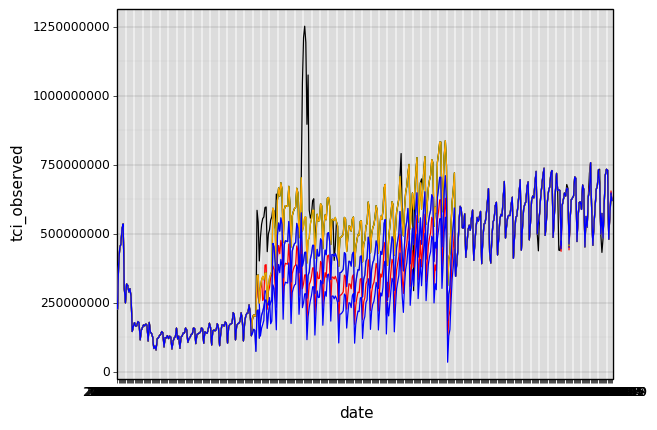

<ggplot: (8735168139661)>

In [28]:
import plotnine as p9
gg = (p9.ggplot(df_union[df_union.region_slug == 'country_mexico'],
                    p9.aes(x = 'date', y='tci_observed', group = 'region_slug')) 
 + p9.geom_line() 
 + p9.geom_line(p9.aes(y = 'tci_cleaned'), color = 'gray')
 + p9.geom_line(p9.aes(y = 'tci_cleaned_ls_20X'), color = 'red')
 + p9.geom_line(p9.aes(y = 'tci_cleaned_ls_4X'), color = 'blue')
 + p9.geom_line(p9.aes(y = 'tci_cleaned_ls_OFF'), color = 'green')
 + p9.geom_line(p9.aes(y = 'tci_cleaned_ls_MIX'), color = 'orange')
 + p9.geom_line(p9.aes( y='tci_cleaned'), color = 'blue'))
gg

### Weekly

#### Several experiments

In [29]:
df_list = list()
for k in range(7):
    file = ['ls1', 'ls4', 'ls10', 'ls15', 'ls20', 'ls100', 'lsmix'][k]
    print(file)
    metric = ['', '_ls_4X', '_ls_10X', '_ls_15X', '_ls_20X', '_ls_OFF', '_ls_MIX'][k]
    
    df = pd.read_csv(f"/home/soniame/shared/spd-sdv-omitnik-waze/corona/cleaning/weekly/weekly_weekly_index_max_{file}.csv")
    df = df[['week', 'days_num', 'date_min', 'region_slug', 
             'tci_observed', 'tcp_observed', 'tci_clean', 'tcp_clean']] \
        .rename(columns = {'tci_clean':f'tci_cleaned{metric}', 
                           'tcp_clean':f'tcp_cleaned{metric}'}) 
    print(df.shape)
    df_list.append(df)
    
from functools import reduce
df_union = reduce(lambda x, y: pd.merge(x, y, on = ['week', 'days_num', 'region_slug', 'date_min', 'tci_observed', 'tcp_observed']), df_list)
print(df_union.shape)
df_union.head(2)    

ls1
(5103, 8)
ls4
(5103, 8)
ls10
(5103, 8)
ls15
(5103, 8)
ls20
(5103, 8)
ls100
(5103, 8)
lsmix
(5103, 8)
(5103, 20)


,week,days_num,date_min,region_slug,tci_observed,tcp_observed,tci_cleaned,tcp_cleaned,tci_cleaned_ls_4X,tcp_cleaned_ls_4X,tci_cleaned_ls_10X,tcp_cleaned_ls_10X,tci_cleaned_ls_15X,tcp_cleaned_ls_15X,tci_cleaned_ls_20X,tcp_cleaned_ls_20X,tci_cleaned_ls_OFF,tcp_cleaned_ls_OFF,tci_cleaned_ls_MIX,tcp_cleaned_ls_MIX
0,1,7,2020-03-09,aguascalientes,18414201,-0.072327,18414201.0,-0.072327,18414201.0,-0.072327,18414201.0,-0.072327,18414201.0,-0.072327,18414201.0,-0.072327,18414201.0,-0.072327,18414201.0,-0.072327
1,2,7,2020-03-16,aguascalientes,9578544,-48.020464,9578544.0,-48.020464,9578544.0,-48.020464,9578544.0,-48.020464,9578544.0,-48.020464,9578544.0,-48.020464,9578544.0,-48.020464,9578544.0,-48.020464


#### Final result

In [ ]:
df_max = pd.read_csv("/home/soniame/shared/spd-sdv-omitnik-waze/corona/cleaning/weekly/weekly_weekly_index_max.csv")

df_max = df_max[df_max.days_num == 7][['week', 'days_num', 'region_slug', 'tci_observed', 'tcp_observed', 'tci_clean', 'tcp_clean']] \
    .rename(columns = {'tci_clean':'tci_cleaned', 
                       'tcp_clean':'tcp_cleaned'}) 

In [ ]:
print(df_max.shape)
df_union = df_max 

#### Export daily data to csv

In [30]:
df_union.describe()


,week,days_num,tci_observed,tcp_observed,tci_cleaned,tcp_cleaned,tci_cleaned_ls_4X,tcp_cleaned_ls_4X,tci_cleaned_ls_10X,tcp_cleaned_ls_10X,tci_cleaned_ls_15X,tcp_cleaned_ls_15X,tci_cleaned_ls_20X,tcp_cleaned_ls_20X,tci_cleaned_ls_OFF,tcp_cleaned_ls_OFF,tci_cleaned_ls_MIX,tcp_cleaned_ls_MIX
count,5103.000000,5103.000000,5.103000e+03,5103.000000,5.103000e+03,5103.000000,5.103000e+03,5103.000000,5.103000e+03,5103.000000,5.103000e+03,5103.000000,5.103000e+03,5103.000000,5.103000e+03,5103.000000,5.103000e+03,5103.000000
mean,32.000000,6.936508,2.790024e+08,-34.671264,2.442584e+08,-42.629095,2.429211e+08,-40.780865,2.480169e+08,-37.678540,2.540020e+08,-37.331430,2.536159e+08,-37.167638,2.707339e+08,-36.799928,2.707339e+08,-36.799928
std,18.186024,0.499986,1.042711e+09,42.864686,8.723835e+08,34.959869,8.420015e+08,35.474897,8.477058e+08,38.425550,8.849214e+08,38.566327,8.860850e+08,38.642219,9.976536e+08,39.107488,9.976536e+08,39.107488
min,1.000000,3.000000,1.082540e+05,-98.661365,1.082540e+05,-98.661365,1.082540e+05,-98.661365,1.082540e+05,-98.661365,1.082540e+05,-98.661365,1.082540e+05,-98.661365,1.082540e+05,-98.661365,1.082540e+05,-98.661365
25%,16.000000,7.000000,1.738580e+07,-64.433839,1.552856e+07,-66.439183,1.639649e+07,-65.617338,1.698805e+07,-64.821407,1.697308e+07,-64.739229,1.700447e+07,-64.739229,1.700447e+07,-64.739229,1.700447e+07,-64.739229
50%,32.000000,7.000000,5.454114e+07,-37.420324,4.852185e+07,-47.344737,5.020497e+07,-44.641136,5.310341e+07,-39.569462,5.314849e+07,-39.021935,5.314849e+07,-38.758425,5.314849e+07,-38.758425,5.314849e+07,-38.758425
75%,48.000000,7.000000,1.519599e+08,-14.134690,1.359307e+08,-24.649289,1.369263e+08,-20.921448,1.413159e+08,-17.443429,1.451420e+08,-16.560632,1.451420e+08,-16.225241,1.451420e+08,-15.930991,1.451420e+08,-15.930991
max,63.000000,7.000000,1.931785e+10,486.853576,1.049764e+10,262.184182,1.046251e+10,262.225675,1.046251e+10,261.745374,1.045943e+10,261.745374,1.046251e+10,261.745374,1.053894e+10,261.745374,1.053894e+10,261.745374


In [31]:
print(df_union.week.max())
print(df_union.date_min.max())
df_union.head()

63
2021-05-17


,week,days_num,date_min,region_slug,tci_observed,tcp_observed,tci_cleaned,tcp_cleaned,tci_cleaned_ls_4X,tcp_cleaned_ls_4X,tci_cleaned_ls_10X,tcp_cleaned_ls_10X,tci_cleaned_ls_15X,tcp_cleaned_ls_15X,tci_cleaned_ls_20X,tcp_cleaned_ls_20X,tci_cleaned_ls_OFF,tcp_cleaned_ls_OFF,tci_cleaned_ls_MIX,tcp_cleaned_ls_MIX
0,1,7,2020-03-09,aguascalientes,18414201,-0.072327,18414201.0,-0.072327,18414201.0,-0.072327,18414201.0,-0.072327,18414201.0,-0.072327,18414201.0,-0.072327,18414201.0,-0.072327,18414201.0,-0.072327
1,2,7,2020-03-16,aguascalientes,9578544,-48.020464,9578544.0,-48.020464,9578544.0,-48.020464,9578544.0,-48.020464,9578544.0,-48.020464,9578544.0,-48.020464,9578544.0,-48.020464,9578544.0,-48.020464
2,3,7,2020-03-23,aguascalientes,5471700,-70.306925,5471700.0,-70.306925,5471700.0,-70.306925,5471700.0,-70.306925,5471700.0,-70.306925,5471700.0,-70.306925,5471700.0,-70.306925,5471700.0,-70.306925
3,4,7,2020-03-30,aguascalientes,4701122,-74.488593,4701122.0,-74.488593,4701122.0,-74.488593,4701122.0,-74.488593,4701122.0,-74.488593,4701122.0,-74.488593,4701122.0,-74.488593,4701122.0,-74.488593
4,5,7,2020-04-06,aguascalientes,3838557,-79.169443,3838557.0,-79.169443,3838557.0,-79.169443,3838557.0,-79.169443,3838557.0,-79.169443,3838557.0,-79.169443,3838557.0,-79.169443,3838557.0,-79.169443


In [32]:
df_union.to_csv("/home/soniame/private/weekly_weekly_index.csv", index=False)

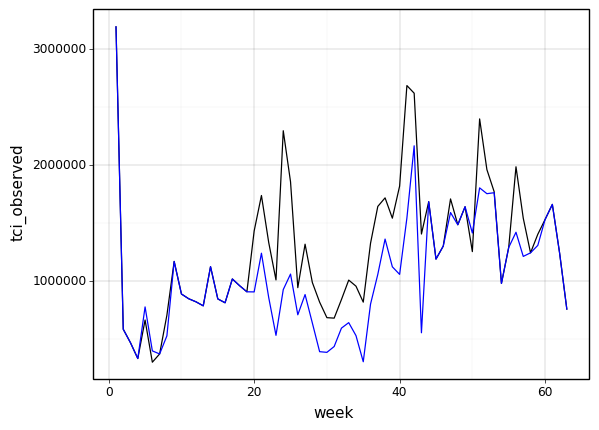

<ggplot: (8735184060937)>

In [33]:
gg = (p9.ggplot(df_union[df_union.region_slug == 'kingston'],
                    p9.aes(x = 'week', y='tci_observed', group = 'region_slug')) 
 + p9.geom_line() 
 + p9.geom_line(p9.aes( y='tci_cleaned'), color = 'blue'))
gg

In [34]:
df_union.head()

,week,days_num,date_min,region_slug,tci_observed,tcp_observed,tci_cleaned,tcp_cleaned,tci_cleaned_ls_4X,tcp_cleaned_ls_4X,tci_cleaned_ls_10X,tcp_cleaned_ls_10X,tci_cleaned_ls_15X,tcp_cleaned_ls_15X,tci_cleaned_ls_20X,tcp_cleaned_ls_20X,tci_cleaned_ls_OFF,tcp_cleaned_ls_OFF,tci_cleaned_ls_MIX,tcp_cleaned_ls_MIX
0,1,7,2020-03-09,aguascalientes,18414201,-0.072327,18414201.0,-0.072327,18414201.0,-0.072327,18414201.0,-0.072327,18414201.0,-0.072327,18414201.0,-0.072327,18414201.0,-0.072327,18414201.0,-0.072327
1,2,7,2020-03-16,aguascalientes,9578544,-48.020464,9578544.0,-48.020464,9578544.0,-48.020464,9578544.0,-48.020464,9578544.0,-48.020464,9578544.0,-48.020464,9578544.0,-48.020464,9578544.0,-48.020464
2,3,7,2020-03-23,aguascalientes,5471700,-70.306925,5471700.0,-70.306925,5471700.0,-70.306925,5471700.0,-70.306925,5471700.0,-70.306925,5471700.0,-70.306925,5471700.0,-70.306925,5471700.0,-70.306925
3,4,7,2020-03-30,aguascalientes,4701122,-74.488593,4701122.0,-74.488593,4701122.0,-74.488593,4701122.0,-74.488593,4701122.0,-74.488593,4701122.0,-74.488593,4701122.0,-74.488593,4701122.0,-74.488593
4,5,7,2020-04-06,aguascalientes,3838557,-79.169443,3838557.0,-79.169443,3838557.0,-79.169443,3838557.0,-79.169443,3838557.0,-79.169443,3838557.0,-79.169443,3838557.0,-79.169443,3838557.0,-79.169443


In [35]:
df.region_slug.unique()[:5]

array(['aguascalientes', 'arequipa', 'barranquilla', 'belem',
       'belohorizonte'], dtype=object)

#### Weekly in long format

In [36]:
df_weekly = pd.read_csv("/home/soniame/private/weekly_weekly_index.csv")
df_weekly.head(2)

,week,days_num,date_min,region_slug,tci_observed,tcp_observed,tci_cleaned,tcp_cleaned,tci_cleaned_ls_4X,tcp_cleaned_ls_4X,tci_cleaned_ls_10X,tcp_cleaned_ls_10X,tci_cleaned_ls_15X,tcp_cleaned_ls_15X,tci_cleaned_ls_20X,tcp_cleaned_ls_20X,tci_cleaned_ls_OFF,tcp_cleaned_ls_OFF,tci_cleaned_ls_MIX,tcp_cleaned_ls_MIX
0,1,7,2020-03-09,aguascalientes,18414201,-0.072327,18414201.0,-0.072327,18414201.0,-0.072327,18414201.0,-0.072327,18414201.0,-0.072327,18414201.0,-0.072327,18414201.0,-0.072327,18414201.0,-0.072327
1,2,7,2020-03-16,aguascalientes,9578544,-48.020464,9578544.0,-48.020464,9578544.0,-48.020464,9578544.0,-48.020464,9578544.0,-48.020464,9578544.0,-48.020464,9578544.0,-48.020464,9578544.0,-48.020464


In [37]:
df_weekly_long = (df_weekly 
 >> select('week', 'days_num', 'date_min', 'region_slug', 
           'tci_observed',  'tci_cleaned', 
           'tci_cleaned_ls_4X', 'tci_cleaned_ls_20X',
           'tci_cleaned_ls_10X', 'tci_cleaned_ls_15X',
           'tci_cleaned_ls_OFF', 'tci_cleaned_ls_MIX',
           'tcp_observed', 'tcp_cleaned', 
           'tcp_cleaned_ls_4X', 'tcp_cleaned_ls_20X', 
           'tci_cleaned_ls_10X', 'tci_cleaned_ls_15X',
           'tcp_cleaned_ls_OFF', 'tcp_cleaned_ls_MIX')
 >> gather('measure', 'value', _["tci_observed":"tcp_cleaned_ls_MIX"])
 >> mutate(type = 'TCP')
)
tci_exist = df_weekly_long['measure'].isin(['tci_observed',  'tci_cleaned', 
           'tci_cleaned_ls_4X', 'tci_cleaned_ls_20X', 
           'tci_cleaned_ls_10X', 'tci_cleaned_ls_15X',
           'tci_cleaned_ls_OFF', 'tci_cleaned_ls_MIX'])
df_weekly_long['type'][tci_exist] = 'TCI'

print(df_weekly_long.type.unique())
print(df_weekly_long.measure.unique())
head(df_weekly_long)

['TCI' 'TCP']
['tci_observed' 'tci_cleaned' 'tci_cleaned_ls_4X' 'tci_cleaned_ls_20X'
 'tci_cleaned_ls_10X' 'tci_cleaned_ls_15X' 'tci_cleaned_ls_OFF'
 'tci_cleaned_ls_MIX' 'tcp_observed' 'tcp_cleaned' 'tcp_cleaned_ls_4X'
 'tcp_cleaned_ls_20X' 'tcp_cleaned_ls_OFF' 'tcp_cleaned_ls_MIX']


/home/soniame/.conda/envs/IDB-IDB-Invest-Coronavirus-Impact-Dashboard/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,week,days_num,date_min,region_slug,measure,value,type
0,1,7,2020-03-09,aguascalientes,tci_observed,18414201.0,TCI
1,2,7,2020-03-16,aguascalientes,tci_observed,9578544.0,TCI
2,3,7,2020-03-23,aguascalientes,tci_observed,5471700.0,TCI
3,4,7,2020-03-30,aguascalientes,tci_observed,4701122.0,TCI
4,5,7,2020-04-06,aguascalientes,tci_observed,3838557.0,TCI


In [38]:
df_weekly_long.to_csv("/home/soniame/private/weekly_weekly_index_long.csv")

### Colombia daily - weekly

#### Daily

In [69]:
import pandas as pd
metadata = pd.read_csv("http://tiny.cc/idb-traffic-metadata")

In [70]:
df_union_daily = pd.read_csv("/home/soniame/private/daily_index_index.csv")
df_co = metadata[metadata.country_iso == 'CO'][['country_name', 'country_iso', 'region_slug']] \
    .merge(df_union_daily ) \
    [['country_name', 'country_iso', 'region_slug', 'date',
       'tcp_observed', 'tcp_cleaned_ls_20X']]


In [71]:
df_co.to_csv("~/shared/spd-sdv-omitnik-waze/corona/cleaning/data/output/colombia_cleaned_daily.csv", 
             index=False)

In [72]:
df_co.region_slug.unique()

array(['barranquilla', 'bucaramanga', 'medellin', 'santamarta', 'cucuta',
       'bogota', 'cartagena', 'country_colombia', 'cali', 'pereira'],
      dtype=object)

In [74]:
df_union_daily.date.min()

'2020-03-09'

#### Weekly

In [67]:
df_union_weekly = pd.read_csv("/home/soniame/private/weekly_weekly_index.csv")
df_co_w = metadata[metadata.country_iso == 'CO'][['country_name', 'country_iso', 'region_slug']] \
    .merge(df_union_weekly ) \
    [['country_name', 'country_iso', 'region_slug', 'date_min', 'week',
       'tcp_observed', 'tcp_cleaned_ls_20X']]

In [68]:
df_co_w.to_csv("~/shared/spd-sdv-omitnik-waze/corona/cleaning/data/output/colombia_cleaned_weekly.csv", 
             index=False)


#### Step run

In [ ]:
df_cty = _load_data()

In [ ]:
df_run_1 = _run_step(df_run = df_cty[['date', 'S1_shift']].sort_values(by=['date']),
                         anomaly_vote_minimun = 1, 
                         c_param=_c_param(region_slug),
                         target_column_name = 'S1_shift',
                         output_column_name = 'S2_shift',
                         print_report = False, 
                         print_plot = True)

In [ ]:
df_run_1.head()

In [ ]:
df_run_2 = _run_step(df_run = df_run_1[['date', 'S1_shift']].sort_values(by=['date']),
                         anomaly_vote_minimun = 1, 
                         c_param=_c_param(region_slug),
                         target_column_name = 'S1_shift',
                         output_column_name = 'S2_shift',
                         print_report = False, 
                         print_plot = True)

In [ ]:
qry = """
select 
    *
from spd_sdv_waze_corona.prod_daily_weekly_index
limit 10
"""
df = pd.read_sql_query(qry, conn)

In [ ]:
df.columns #sort_values('week_number')

In [ ]:
import pandas as pd
metadata = pd.read_csv("http://tiny.cc/idb-traffic-metadata")

In [77]:
print(len(metadata.region_slug))
print(metadata.region_slug.unique())

metadata.head()

139
['country_guatemala' 'barranquilla' 'buenosaires' 'caracas'
 'br_states_maranhao' 'maracay' 'country_dominican_republic' 'saopaulo'
 'manaus' 'br_states_minas_gerais' 'montevideo' 'merida' 'ciudad_guayana'
 'br_states_amazonas' 'lapaz' 'country_peru' 'sanpedrosula'
 'country_argentina' 'br_states_rio_de_janeiro' 'cordoba'
 'country_el_salvador' 'bucaramanga' 'tijuana' 'medellin'
 'br_states_mato_grosso' 'maceio' 'br_states_pernambuco' 'guayaquil'
 'br_states_paraiba' 'country_nicaragua' 'santodomingo' 'panamacity'
 'sanfernado' 'arequipa' 'country_uruguay' 'guatemala' 'natal'
 'sanluispotosi' 'georgetown' 'br_states_santa_catarina' 'santamarta'
 'sansalvador' 'juarez' 'br_states_para' 'salvador' 'br_states_alagoas'
 'br_states_espirito_santo' 'tegucigalpa' 'country_costa_rica'
 'br_states_bahia' 'bridgetown' 'riodejaneiro' 'cucuta' 'br_states_amapa'
 'toluca' 'bogota' 'managua' 'country_honduras' 'queretaro'
 'br_states_piaui' 'leon' 'country_paraguay' 'country_guyana'
 'country_ja

,country_name,country_iso,region_slug,region_name,region_type,population,timezone,region_shapefile_wkt,osm_length,daily_coef_var,...,daily_coef_var_weekday,weekend_osm_ratio,weekday_osm_ratio,daily_approved,weekly_approved,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,Guatemala,GT,country_guatemala,Guatemala,country,17915567.0,America/Guatemala,MULTIPOLYGON (((-92.2393264773401 14.541251788...,5.664239e+07,0.257001,...,0.253105,0.958859,1.153470,True,True,NaN,NaN,NaN,NaN,NaN
1,Colombia,CO,barranquilla,Barranquilla,city,1931750.0,America/Bogota,POLYGON ((-74.83374991971161 11.04958488300598...,2.609151e+06,0.316392,...,0.346008,3.327034,4.944916,True,True,NaN,NaN,NaN,NaN,NaN
2,Argentina,AR,buenosaires,Buenos Aires,city,14338718.0,America/Argentina/Buenos_Aires,POLYGON ((-58.75041764050466 -34.3670848864218...,3.033681e+07,0.326066,...,0.423715,1.914411,2.969939,True,True,NaN,NaN,NaN,NaN,NaN
3,Venezuela,VE,caracas,Caracas,city,2408266.0,America/Caracas,POLYGON ((-67.00833333335606 10.39999999997973...,3.187649e+06,0.758516,...,1.737158,0.571506,1.639975,False,False,NaN,NaN,NaN,NaN,NaN
4,Brasil,BR,br_states_maranhao,Maranhao,state,NaN,NaN,POLYGON ((-45.84073319904228 -1.04548473090940...,7.803499e+07,0.355675,...,0.421830,0.376916,0.475001,True,True,NaN,NaN,NaN,NaN,NaN


In [78]:
metadata[metadata.region_slug == 'mexicocity'].region_shapefile_wkt.to_list()

['POLYGON ((-99.22541498771096 19.79958548078565, -99.19208165656235 19.79958548078565, -99.17541499098803 19.77458547907771, -99.15041499262657 19.77458547907771, -99.15041499262657 19.73291880956447, -99.12541499426511 19.73291880956447, -99.10041499590365 19.70791880785653, -99.06708166475504 19.71625214175918, -99.06708166475504 19.69125214005124, -98.99208166967065 19.70791880785653, -98.96708167130919 19.74125214346712, -98.92541500737342 19.69958547395388, -98.95041500573488 19.69125214005124, -98.95874833852204 19.65791880444065, -98.97541500409635 19.65791880444065, -98.96708167130919 19.63291880273271, -98.94208167294772 19.63291880273271, -98.91708167458627 19.65791880444065, -98.8754150106505 19.649585470538, -98.88374834343765 19.63291880273271, -98.90874834179911 19.63291880273271, -98.88374834343765 19.61625213492741, -98.89208167622481 19.59125213321947, -98.85041501228903 19.54125212980358, -98.85041501228903 19.49958546029035, -98.8754150106505 19.47458545858241, -98.